# **Heart Disease Health Indicators Exploratory Data Analysis**

We will dive into the 2021 BRFSS Survey Data and explore its features and their relationships with heart disease. We will also visualize the data to gain insights into the patterns and trends of heart disease. Our goal is to understand the data and identify potential risk factors for heart disease.

## Setup
Load the data, libraries, packages, and helper functions

In [8]:
# General Libraries
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

### Helper Functions

In [2]:
def data_aggregation(df, col):
    # Aggregate the category by ID count and target sum
    # col is the feature name e.g. mh_status, stroke
    # df is the name of the dataframe
    groupby_result = df.groupby([col]).agg( 
        total_population=('id', 'count'),
        heart_disease=('target', 'sum')
    ).reset_index()
    
    # Add columns for the percentage and no_disease
    groupby_result['%heart_disease'] = round((groupby_result['heart_disease']/groupby_result['total_population'])*100, 2)
    groupby_result['no_disease'] = groupby_result['total_population'] - groupby_result['heart_disease']
    groupby_result['%no_disease'] = round((groupby_result['no_disease']/groupby_result['total_population'])*100,2)
    
    groupby_result = groupby_result.sort_values('%heart_disease', ascending=False)
    
    return groupby_result

In [3]:
def data_agg_viz(df, col, rotation=0, fontsize=10, figsize=(5,3)):
    # Sort the dataframe by '%heart_disease'
    df = df.sort_values(by='%heart_disease', ascending=False).reset_index(drop=True)

    # Set figure size
    fig, ax = plt.subplots(figsize=figsize, dpi=400)

    # Define the data
    # col is the feature name e.g. mh_status, stroke
    # df is the name of the dataframe
    x = df[col]
    y1 = df['%heart_disease']
    y2 = df['%no_disease']

    # Plot the stacked bars horizontally
    ax.barh(x, y1, color='#FF3333', label='Heart Disease')
    ax.barh(x, y2, left=y1, color='#CCCCCC', label='No Heart Disease')

    # Add labels to the bars
    for i, v in enumerate(y1):
        ax.text((v + y2[i]) / 10, i, f"{v:.2f}%", color='white', ha='center', va='center')

    # Add legend
    # ax.legend()

    # Add axis labels and title
    # ax.set_xlabel(f'{col}')
    # ax.set_ylabel('% with Heart Disease')
    # ax.set_title(f'Heart Disease by {col}')

    # Rotate x labels
    plt.xticks(rotation=rotation, fontsize=fontsize)

    # Invert the y-axis to show the categories from top to bottom
    ax.invert_yaxis()

    plt.show()

### Load the Data

In [4]:
# Load and read the data
heart_data = pd.read_csv('../data/2021_brfss_unmapped_nodup_heart_disease_health_indicators.csv')
heart_data.head()

,target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,DepressiveDisorder,MentHlthStatus,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,1.0,...,5.0,10.0,20.0,0.0,0.0,2.0,0.0,11.0,4.0,5.0
1,1.0,1.0,1.0,1.0,28.0,0.0,0.0,2.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,4.0,3.0
2,0.0,1.0,0.0,1.0,33.0,0.0,0.0,2.0,1.0,1.0,...,2.0,10.0,0.0,0.0,0.0,2.0,0.0,9.0,4.0,7.0
3,1.0,0.0,0.0,1.0,29.0,0.0,1.0,2.0,1.0,1.0,...,5.0,0.0,30.0,1.0,0.0,1.0,1.0,12.0,3.0,4.0
4,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,1.0,1.0,13.0,5.0,6.0


In [5]:
heart_data_cl = pd.read_csv('../data/2021_brfss_clean_heart_disease_health_indicators.csv')
heart_data_cl.head(2)

,target,mental_health,physical_health,high_bp,high_chol,chol_check,bmi_category,smoker,stroke,diabetes_category,...,health_insurance,no_doc_cost,general_health,difficult_walk,depressive_disorder,mh_status,sex,age_grp,educ_grp,income_grp
0,0,10,20,No,No,Yes,Underweight,No,No,No or During Pregnancy,...,Yes,No,Poor,No,No,1-13 days not good,Female,70-74,Grade 12 or GED (High School Graduate),25k-35k USD
1,1,0,0,Yes,Yes,Yes,Overweight,No,No,Existing Diabetes,...,Yes,No,Very good,No,No,0 days not good,Female,70-74,Grade 12 or GED (High School Graduate),15k-20k USD


In [6]:
heart_data_cl['id']=range(1, len(heart_data_cl) + 1)
heart_data_cl.head(2)

,target,mental_health,physical_health,high_bp,high_chol,chol_check,bmi_category,smoker,stroke,diabetes_category,...,no_doc_cost,general_health,difficult_walk,depressive_disorder,mh_status,sex,age_grp,educ_grp,income_grp,id
0,0,10,20,No,No,Yes,Underweight,No,No,No or During Pregnancy,...,No,Poor,No,No,1-13 days not good,Female,70-74,Grade 12 or GED (High School Graduate),25k-35k USD,1
1,1,0,0,Yes,Yes,Yes,Overweight,No,No,Existing Diabetes,...,No,Very good,No,No,0 days not good,Female,70-74,Grade 12 or GED (High School Graduate),15k-20k USD,2


## Correlation
High blood pressure, stroke, diabetes, general health, physical health, difficulty walking, and age are the most correlated features with respect to `target`. 

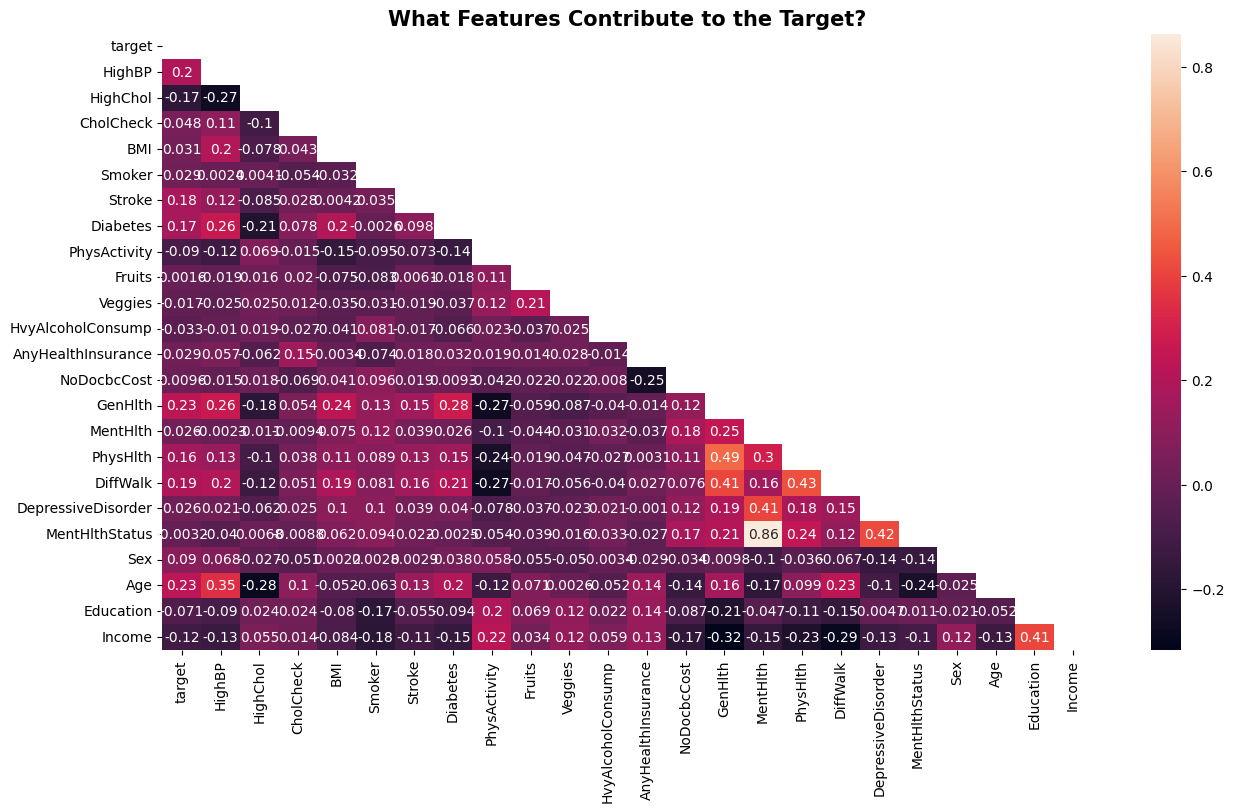

In [9]:
# Visualize the correlation of all features
corr = heart_data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot= True, mask=mask)
ax.set_title("What Features Contribute to the Target?", fontsize=15, y=1,
             weight='bold')
plt.show()

## Demographics

### Biological Sex

Our dataset shows that **males are about 50% more likely than females** to be afflicted by heart disease. This is likely due to:

1. **Lifestyle factors**. Men are more likely to engage in certain lifestyle behaviors that increase the risk of heart disease, such as **smoking and excessive alcohol consumption**.
2. **Hormonal differences**. Estrogen, a female sex hormone, helps to keep blood vessels flexible and can reduce the buildup of plaque in the arteries. **As women go through menopause, their estrogen levels decrease, which can increase the risk of heart disease**.

Source: [The protective effects of estrogen on the cardiovascular system](https://pubmed.ncbi.nlm.nih.gov/10362825/)

In [10]:
sex = data_aggregation(heart_data_cl, 'sex')
sex

,sex,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Male,95225,12166,12.78,83059,87.22
0,Female,107129,7757,7.24,99372,92.76


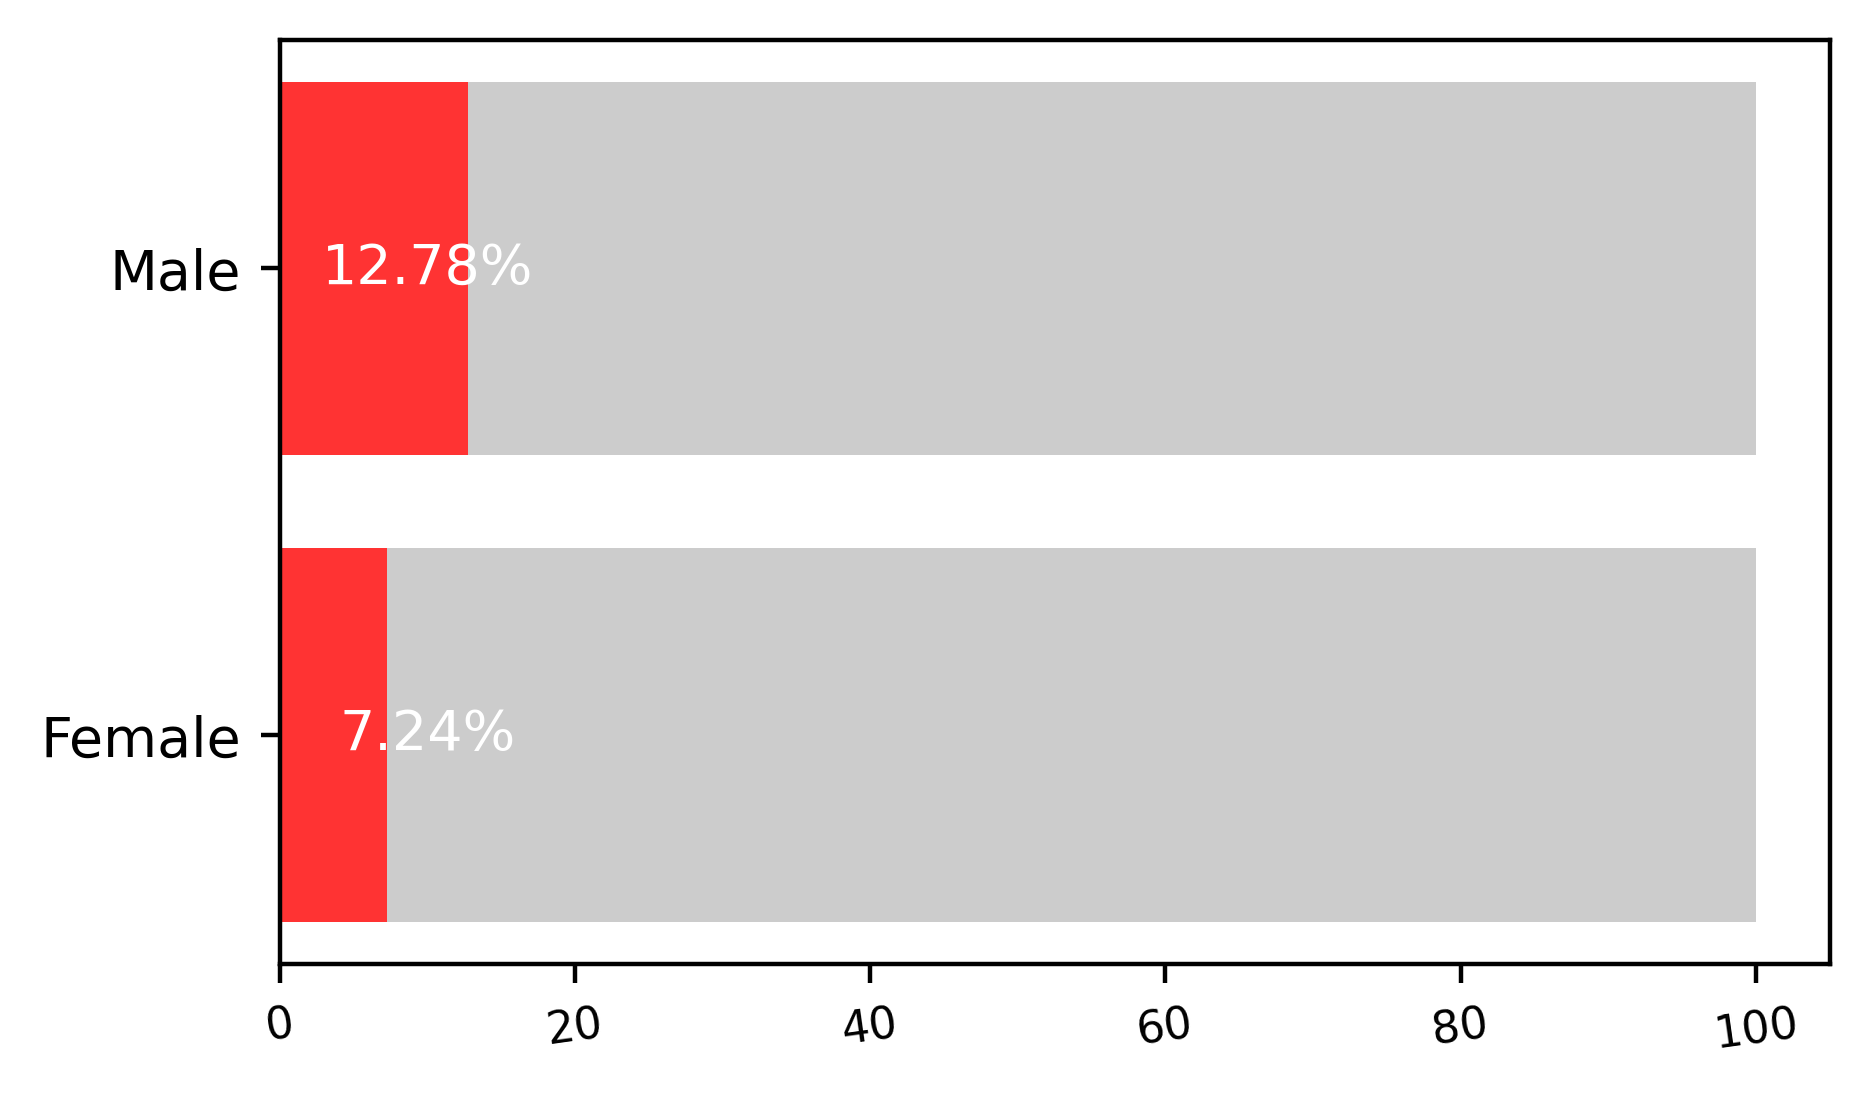

In [11]:
data_agg_viz(sex, 'sex', rotation=8, fontsize=8)

### Age Group

The older you get, the more likely you are to be afflicted by heart disease. Here's why: 

As people age, the heart and blood vessels undergo various changes such as **thickening and stiffening of the arteries**, **reduced elasticity of blood vessels**, and **decreased pumping ability of the heart**, contributing to the likelihood of heart disease.

Source: [Aging and heart disease](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack/aging-and-heart-disease)

In [12]:
age = data_aggregation(heart_data_cl, 'age_grp')
age

,age_grp,total_population,heart_disease,%heart_disease,no_disease,%no_disease
12,80 and up,13922,3465,24.89,10457,75.11
11,75-79,14106,2942,20.86,11164,79.14
10,70-74,21344,3643,17.07,17701,82.93
9,65-69,23260,3226,13.87,20034,86.13
8,60-64,23177,2517,10.86,20660,89.14
7,55-59,20330,1703,8.38,18627,91.62
6,50-54,17981,1037,5.77,16944,94.23
5,45-49,15132,600,3.97,14532,96.03
4,40-44,14643,353,2.41,14290,97.59
3,35-39,13161,206,1.57,12955,98.43


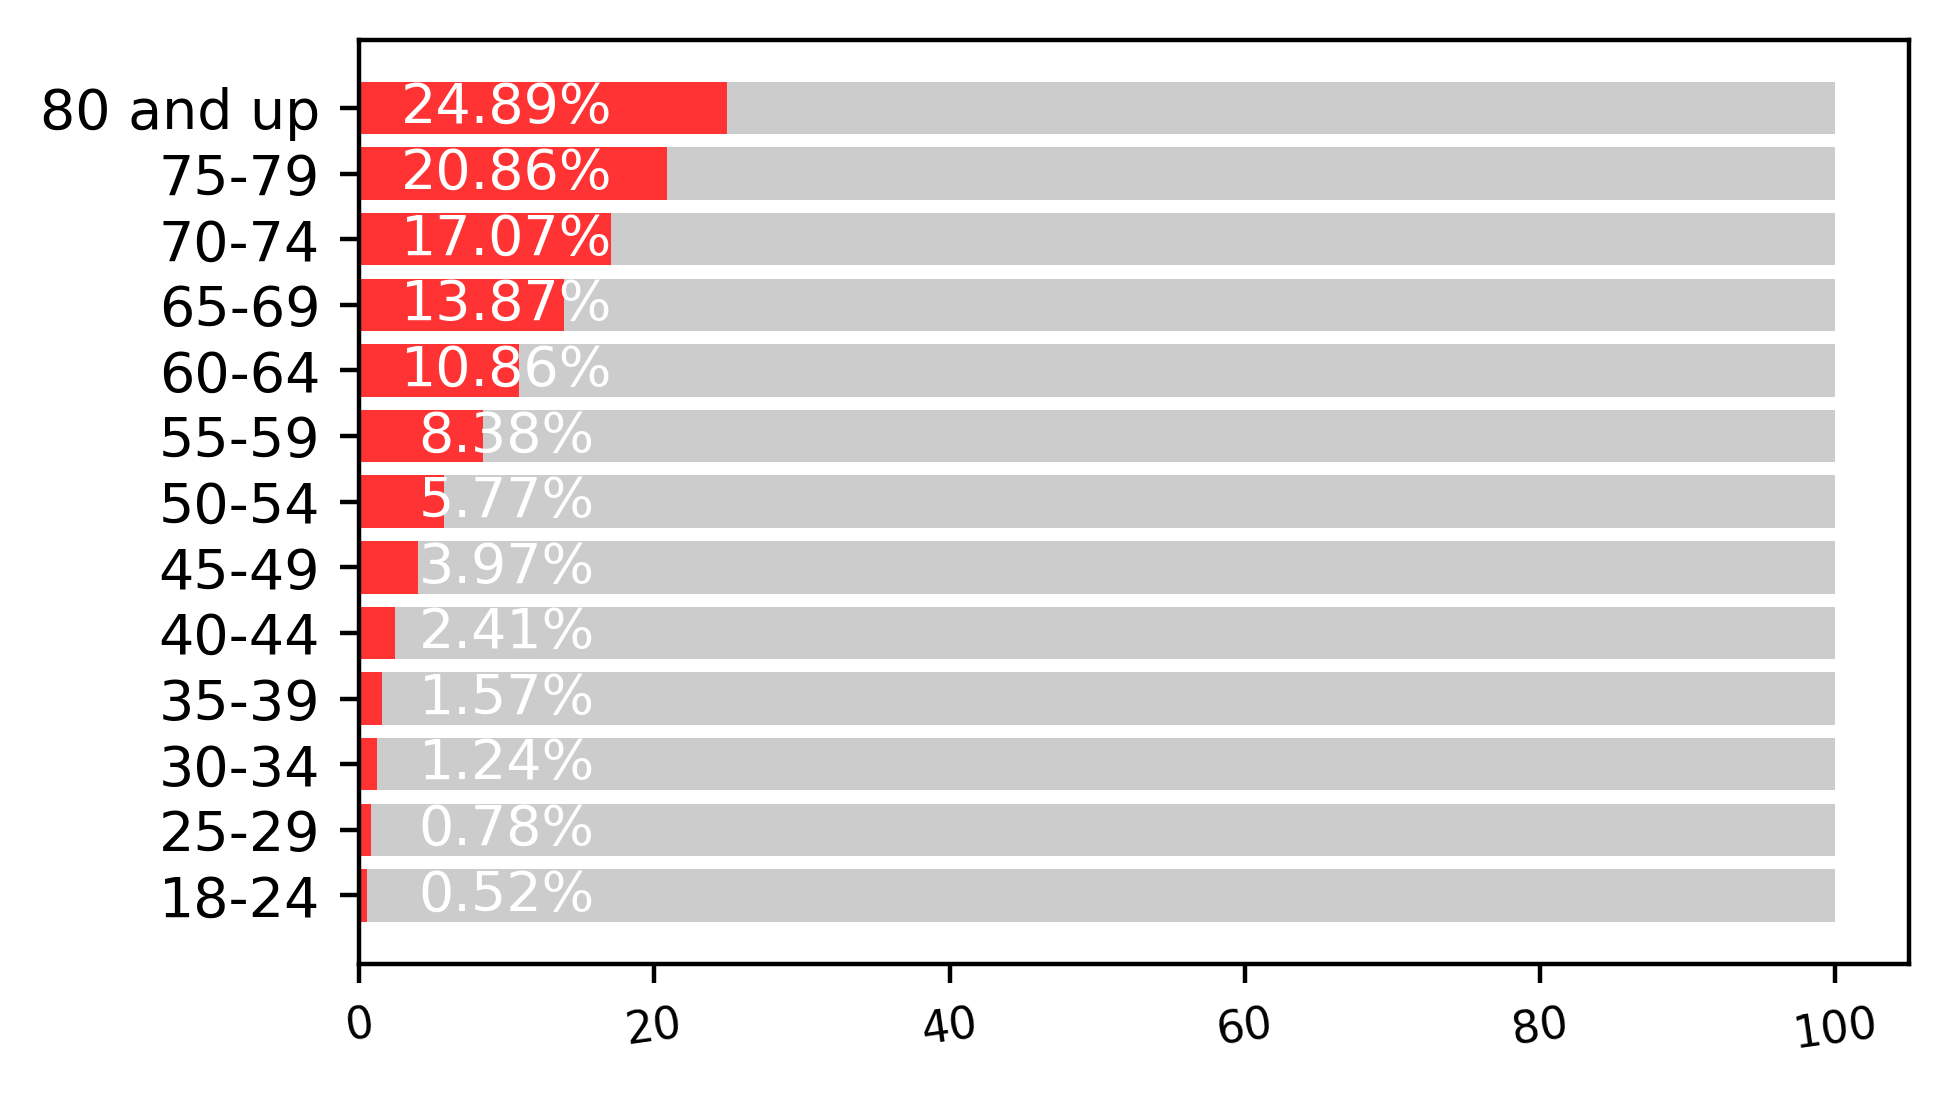

In [13]:
data_agg_viz(age, 'age_grp', rotation=8, fontsize=8)

### Income Group
Generally, the richer you are, the less likely you are to be afflicted by heart disease. Here's why: 

1. **Access to healthcare**. Wealthier individuals are more likely to have access to quality healthcare, improving their chances of receiving timely treatment for heart disease risk factors.
2. **Less occupational exposure**. Wealthier individuals are less likely to be occupationally exposed to hazardous pollutants or chemicals, which can increase the risk of heart disease.

Source: [Socioeconomic inequalities in health in 22 European countries](https://pubmed.ncbi.nlm.nih.gov/18525043/)

In [14]:
income = data_aggregation(heart_data_cl, 'income_grp')
income

,income_grp,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,10k-15k USD,6809,1134,16.65,5675,83.35
3,15k-20k USD,8725,1387,15.90,7338,84.10
10,Less than 10k USD,5816,840,14.44,4976,85.56
5,20k-25k USD,12352,1778,14.39,10574,85.61
6,25k-35k USD,25558,3155,12.34,22403,87.66
7,35k-50k USD,28925,3183,11.00,25742,89.00
8,50k-75k USD,35589,3358,9.44,32231,90.56
9,75k-100k USD,28361,2164,7.63,26197,92.37
0,100k-150k USD,27619,1755,6.35,25864,93.65
4,200k USD or more,10677,561,5.25,10116,94.75


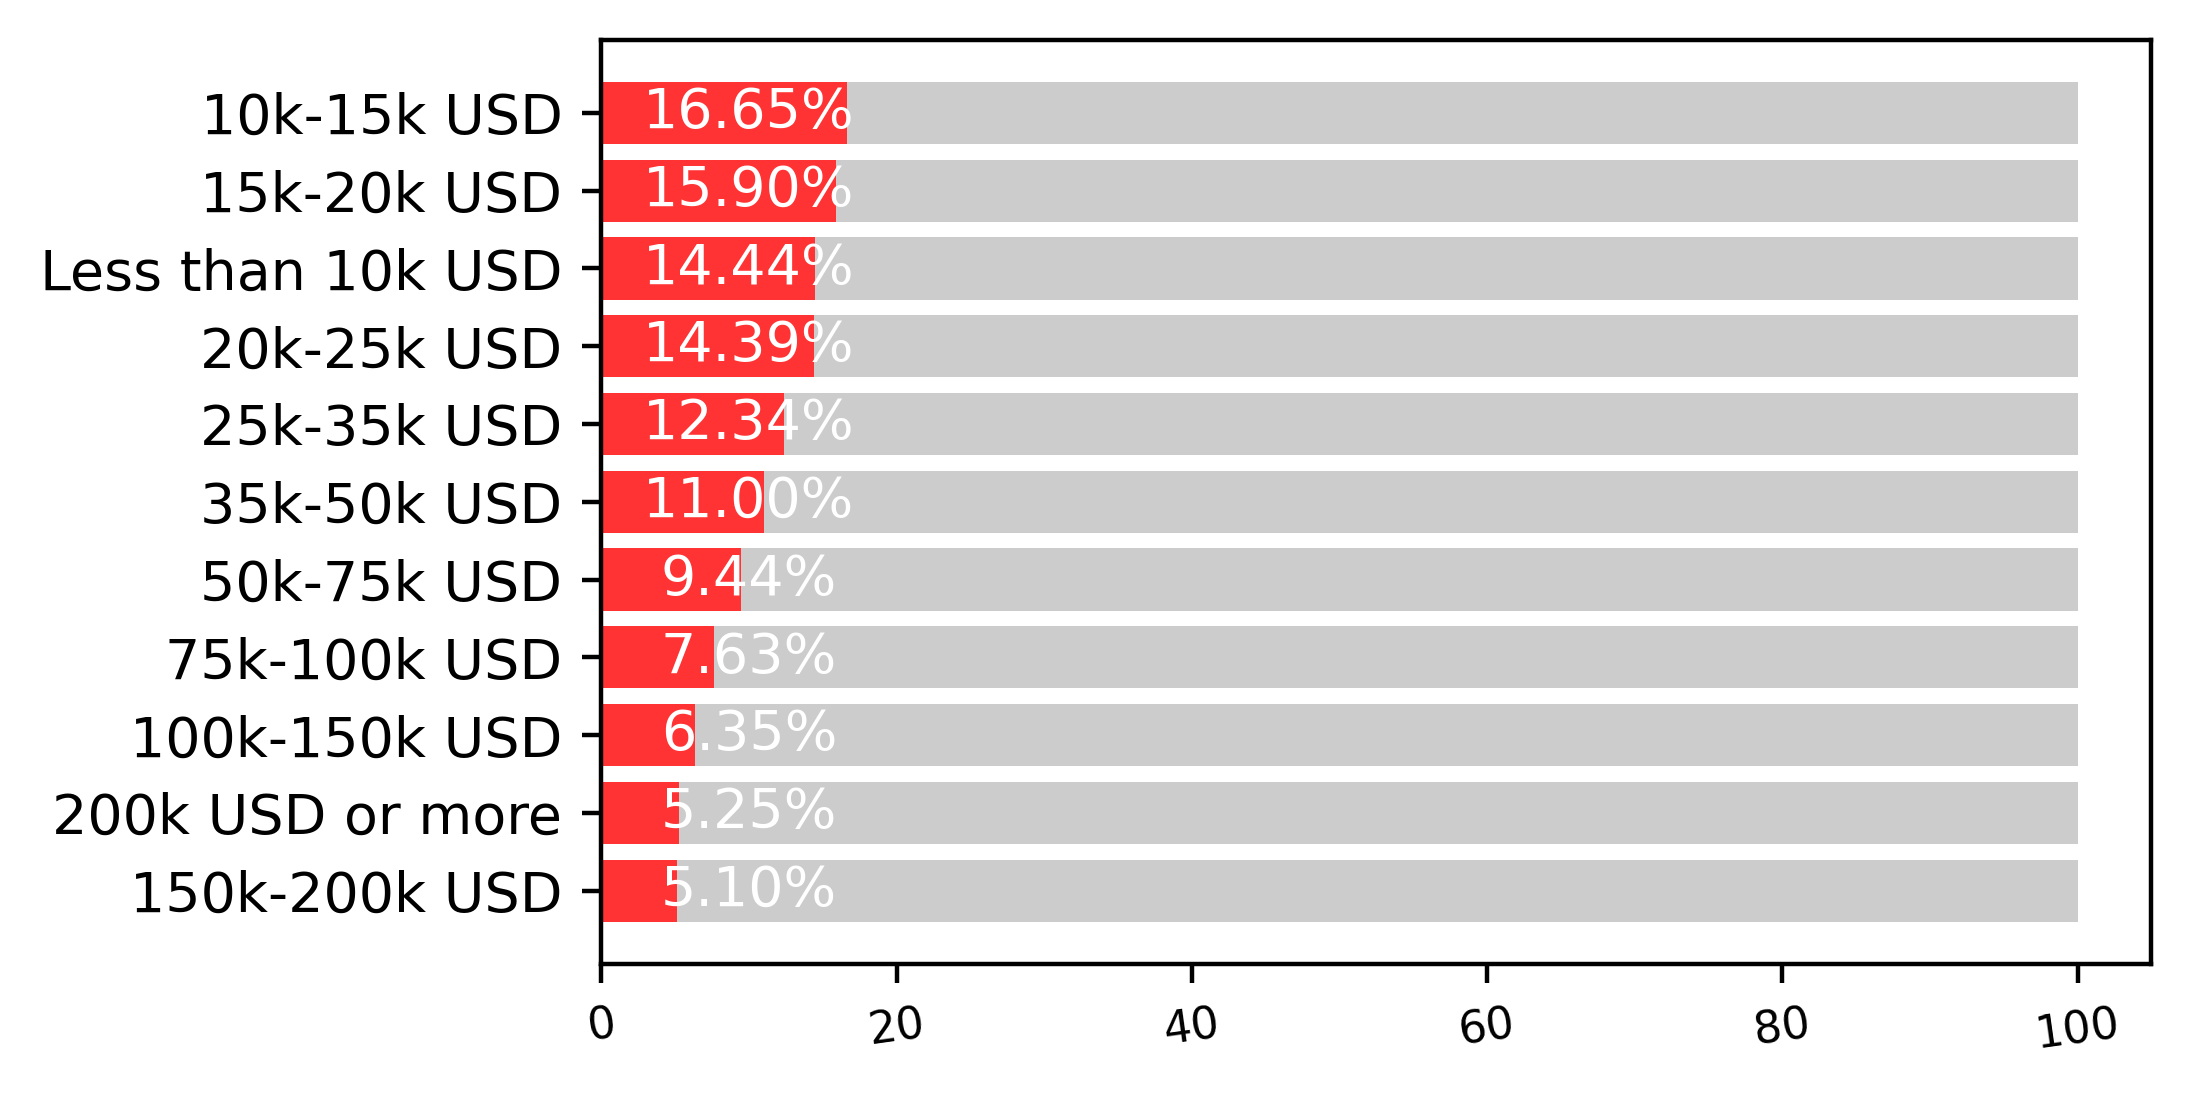

In [15]:
data_agg_viz(income, 'income_grp', rotation=8, fontsize=8)

In [16]:
age = data_aggregation(heart_data_cl, 'age_grp')
age

,age_grp,total_population,heart_disease,%heart_disease,no_disease,%no_disease
12,80 and up,13922,3465,24.89,10457,75.11
11,75-79,14106,2942,20.86,11164,79.14
10,70-74,21344,3643,17.07,17701,82.93
9,65-69,23260,3226,13.87,20034,86.13
8,60-64,23177,2517,10.86,20660,89.14
7,55-59,20330,1703,8.38,18627,91.62
6,50-54,17981,1037,5.77,16944,94.23
5,45-49,15132,600,3.97,14532,96.03
4,40-44,14643,353,2.41,14290,97.59
3,35-39,13161,206,1.57,12955,98.43


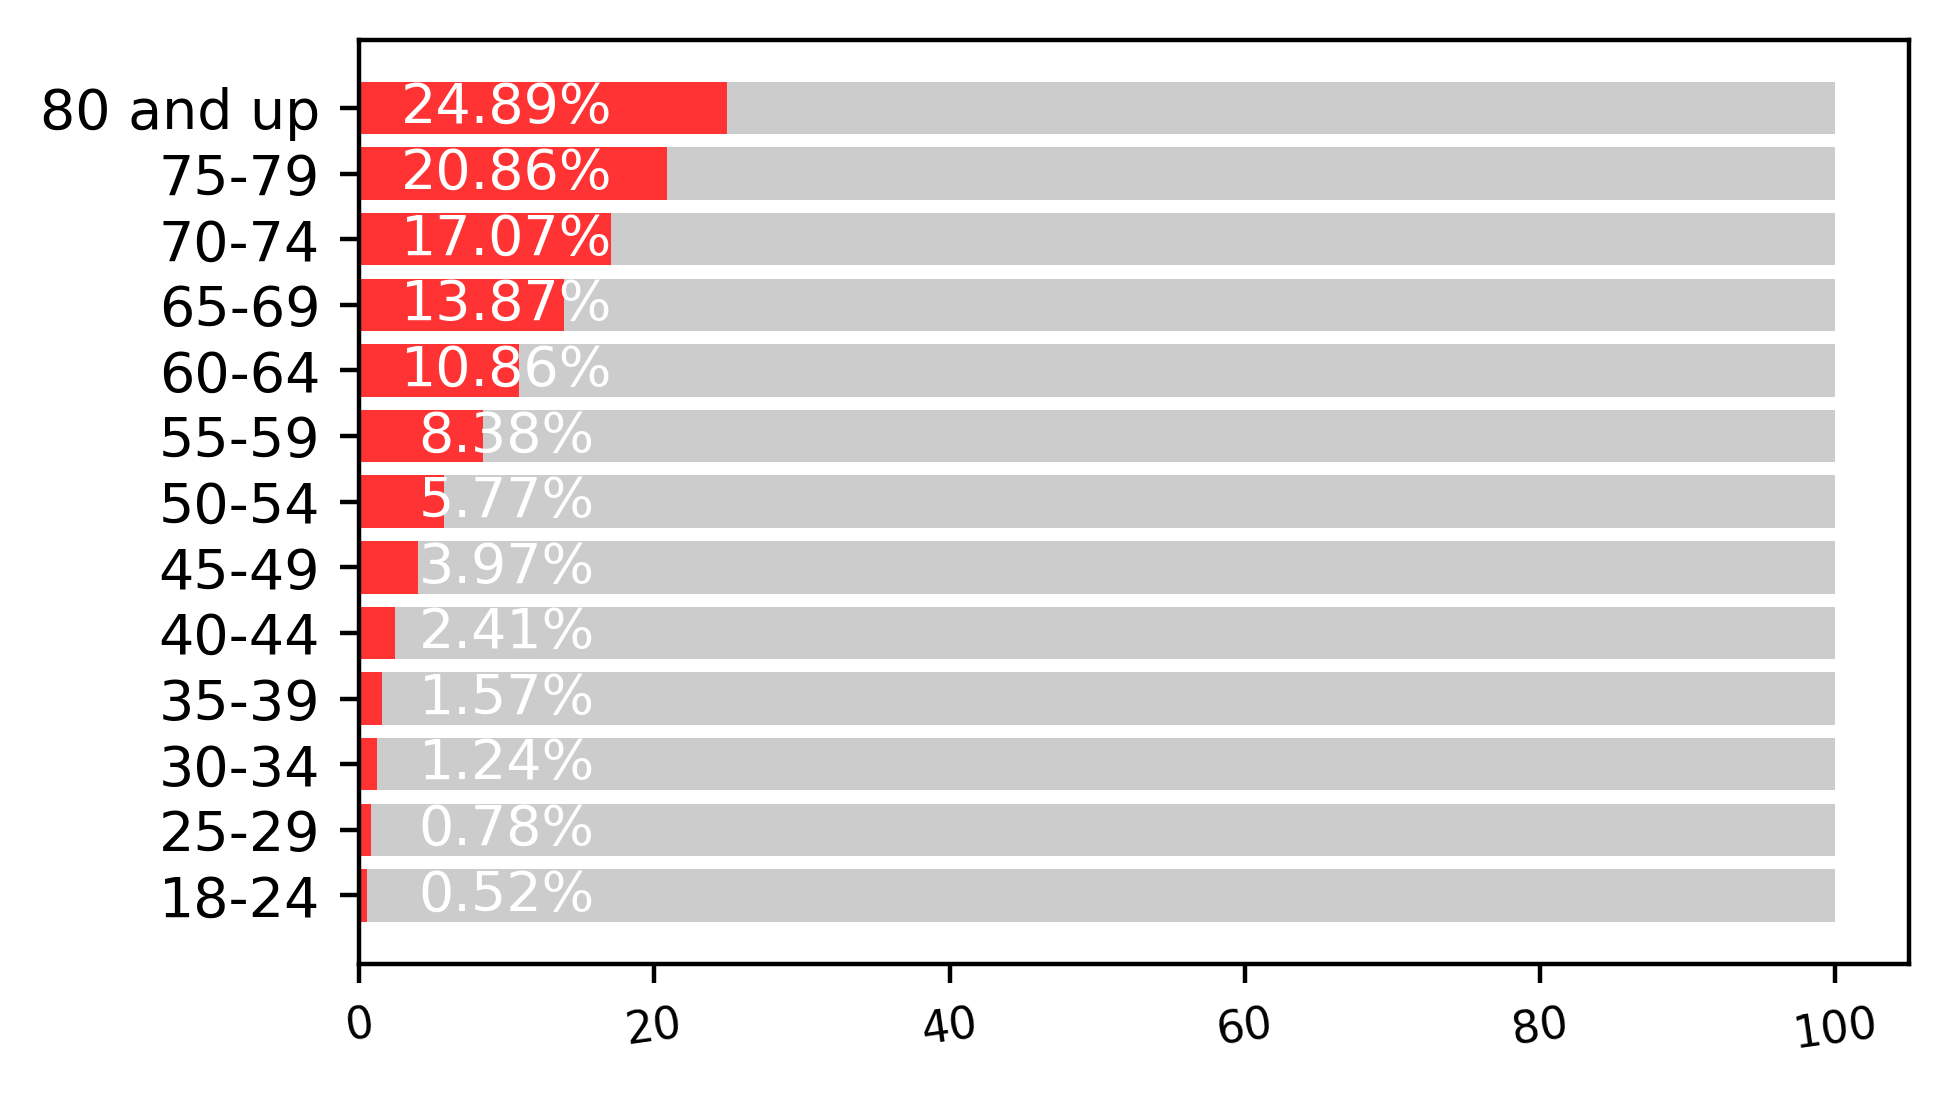

In [17]:
data_agg_viz(age, 'age_grp', rotation=8, fontsize=8)

## Health Behaviors

### Difficulty Walking

Interestingly, those with difficulty walking are **thrice as likely** to be afflicted by heart disease than those who don't. Key possible reasons are:

1. **Higher rates of obesity**. Difficulty walking contributes to obesity, which in turn increases the risk of **high blood pressure**, and other cardiovascular risk factors.
2. **Higher rates of diabetes**. Those with difficulty walking are more likely diabetic, which itself is a major risk factor for heart disease, as it can **damage blood vessels and increase the risk of atherosclerosis**.

Source: [Lower-extremity function in persons over the age of 70 years as a predictor of subsequent disability](https://pubmed.ncbi.nlm.nih.gov/7838189/)

In [18]:
difficult_walk = data_aggregation(heart_data_cl, 'difficult_walk')
difficult_walk

,difficult_walk,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,36023,7758,21.54,28265,78.46
0,No,166331,12165,7.31,154166,92.69


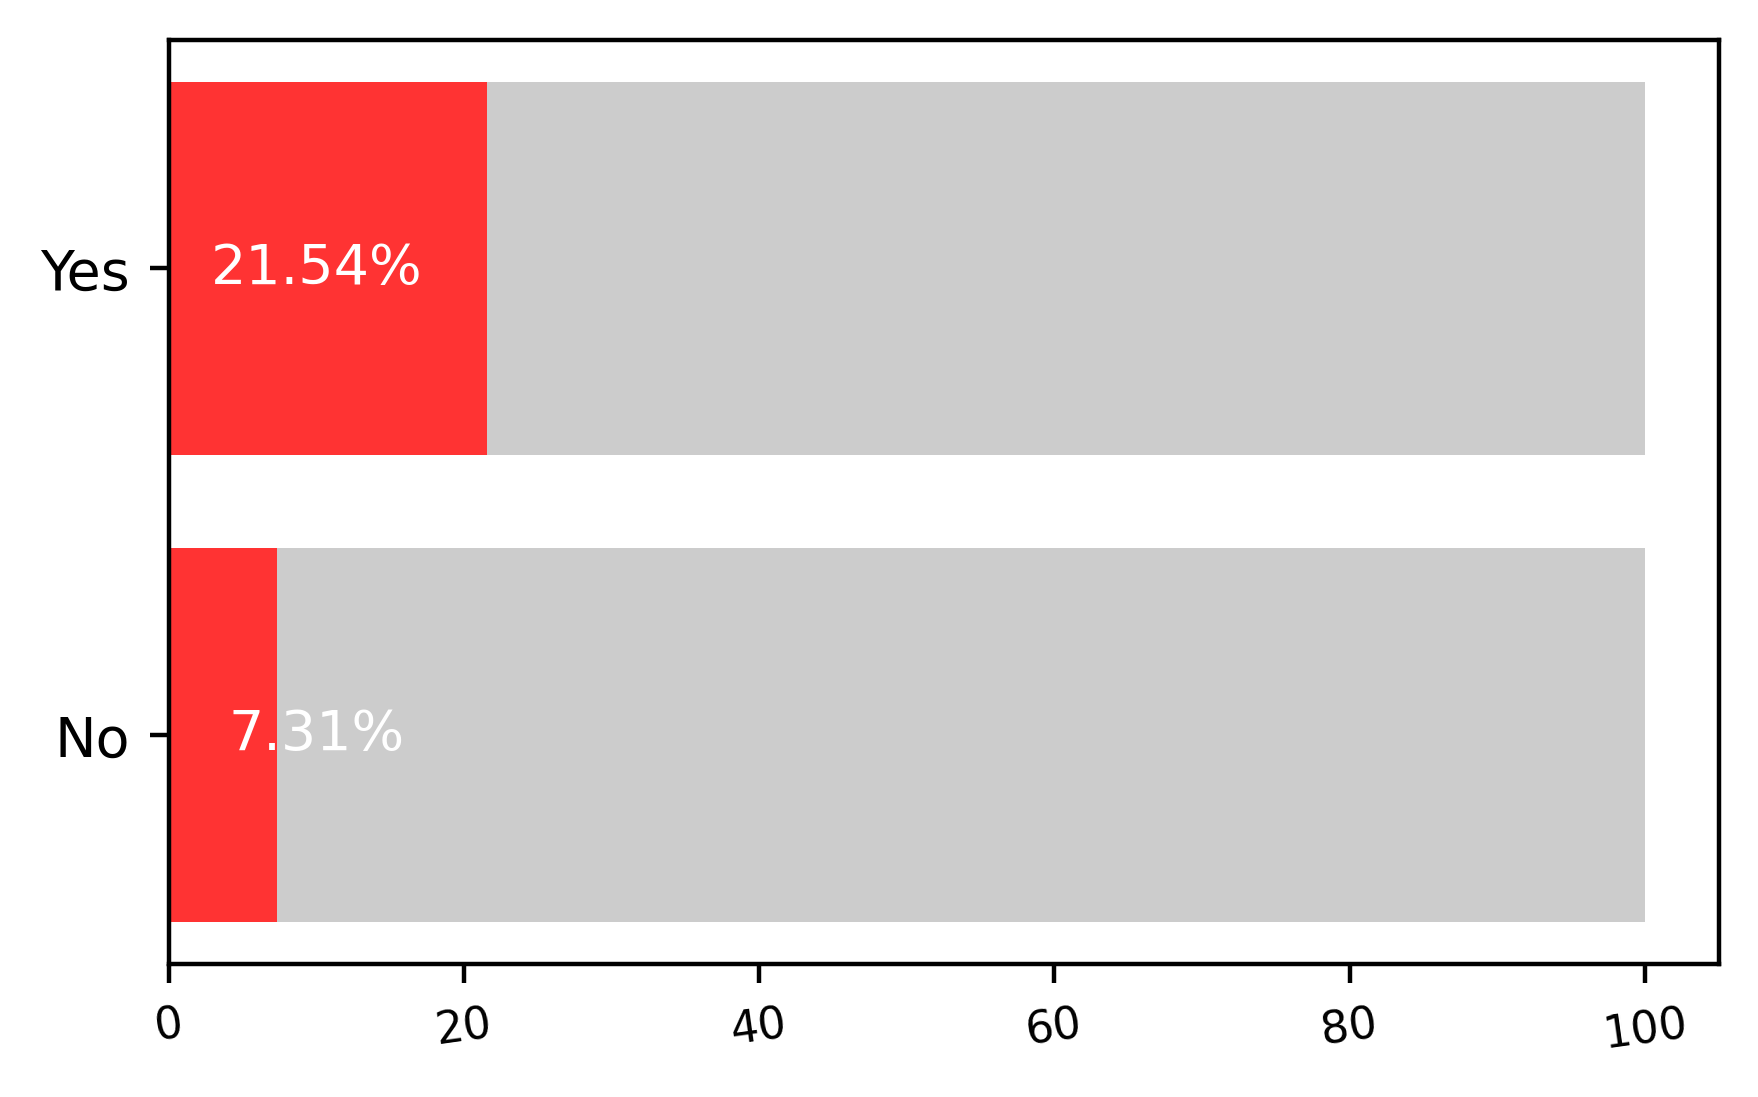

In [19]:
data_agg_viz(difficult_walk, 'difficult_walk', rotation=8, fontsize=8)

### Physical Activity

People who engage in physical activity are almost **less than twice as likely** to have heart disease compared to people who don't. 

This is unsurprising as physical activity contributes to **improved cardiovascular health**, strengthening the heart and blood vessels, improving blood flow, and reducing inflammation.

Source: [Physical Activity Improves Quality of Life](https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults.)

In [20]:
physical_activity = data_aggregation(heart_data_cl, 'physical_activity')
physical_activity

,physical_activity,total_population,heart_disease,%heart_disease,no_disease,%no_disease
0,No,51191,7161,13.99,44030,86.01
1,Yes,151163,12762,8.44,138401,91.56


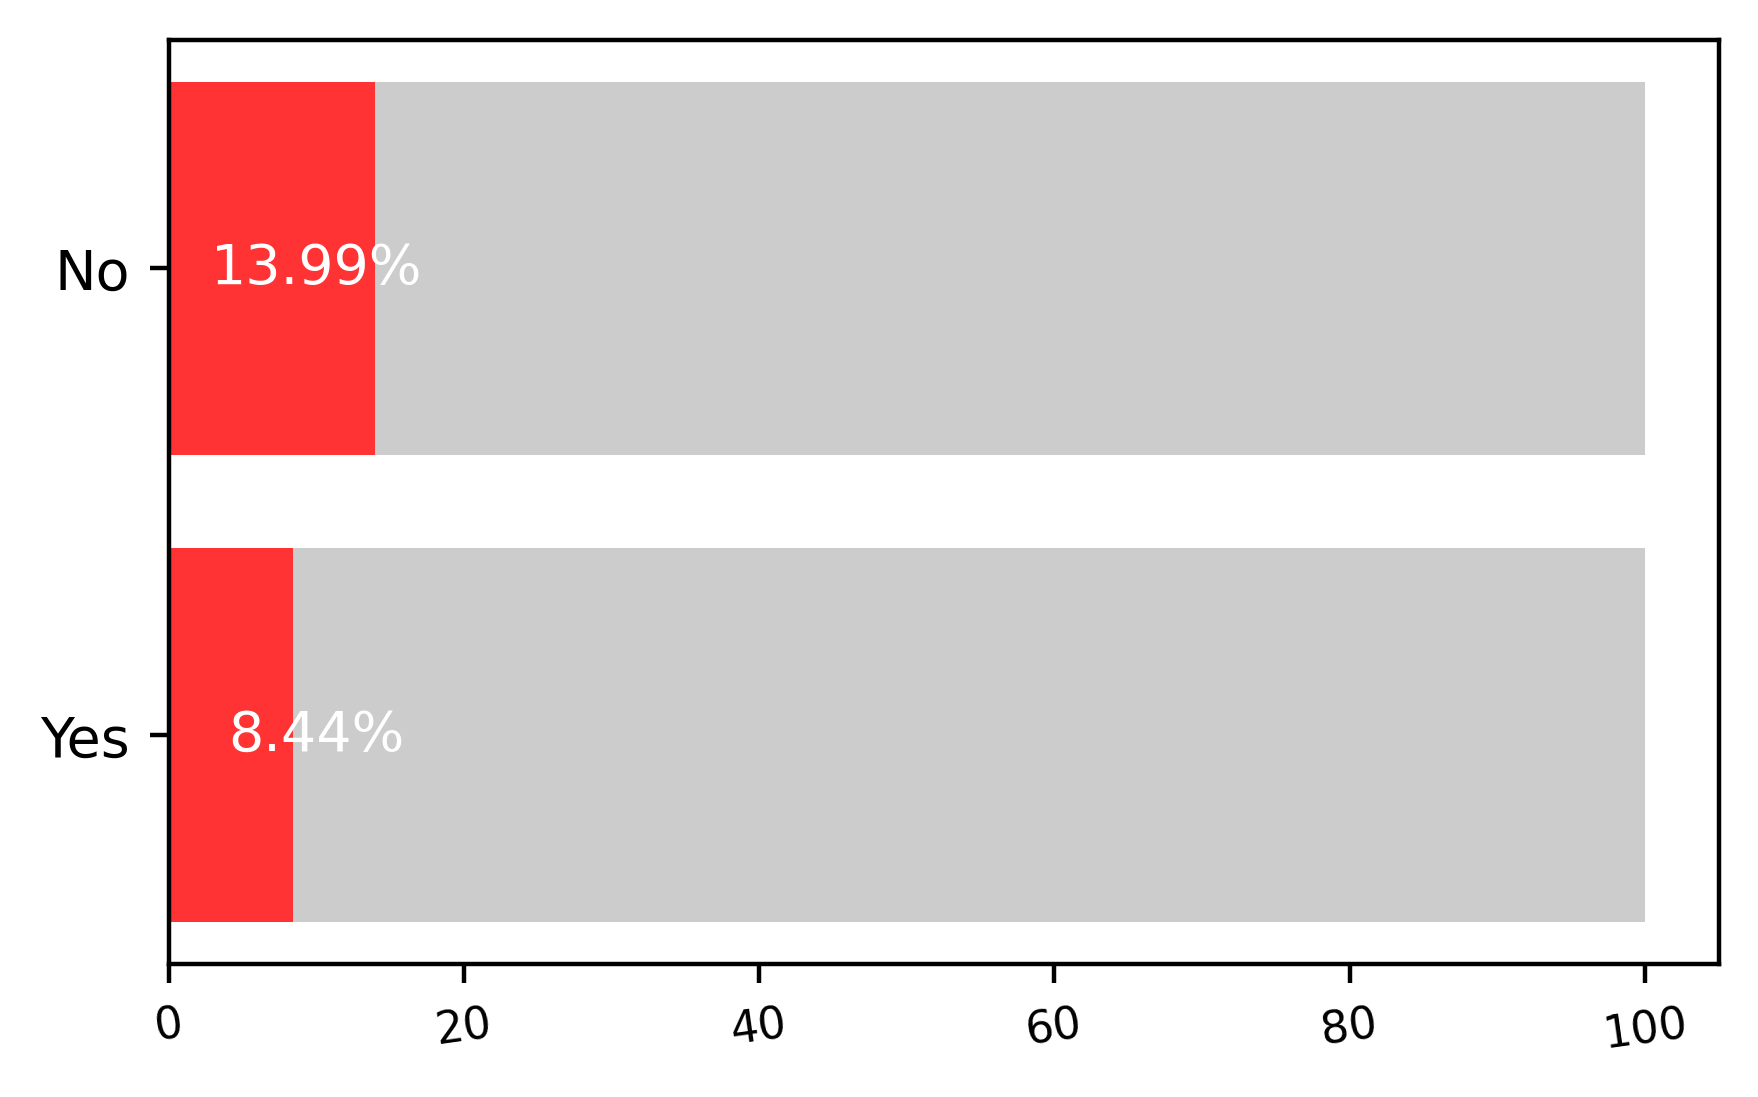

In [21]:
data_agg_viz(physical_activity, 'physical_activity', rotation=8, fontsize=8)

### Alcohol Consumption

This is a particularly interesting result, where those who **consume alcohol are almost less than twice as likely to contract heart disease than teetotalers**.

There is some evidence to suggest that **moderate alcohol consumption can lower the risk of heart disease**. 

One possible theory is that alcohol consumption improves insulin sensitivity, which can help to **lower the risk of type 2 diabetes**. 

Source: [Moderate alcohol intake and cardiovascular disease](https://www.health.harvard.edu/blog/moderate-alcohol-intake-and-cardiovascular-disease-2021030522361)

In [22]:
alcohol_consumption = data_aggregation(heart_data_cl, 'alcohol_consumption')
alcohol_consumption

,alcohol_consumption,total_population,heart_disease,%heart_disease,no_disease,%no_disease
0,No,188147,19108,10.16,169039,89.84
1,Yes,14207,815,5.74,13392,94.26


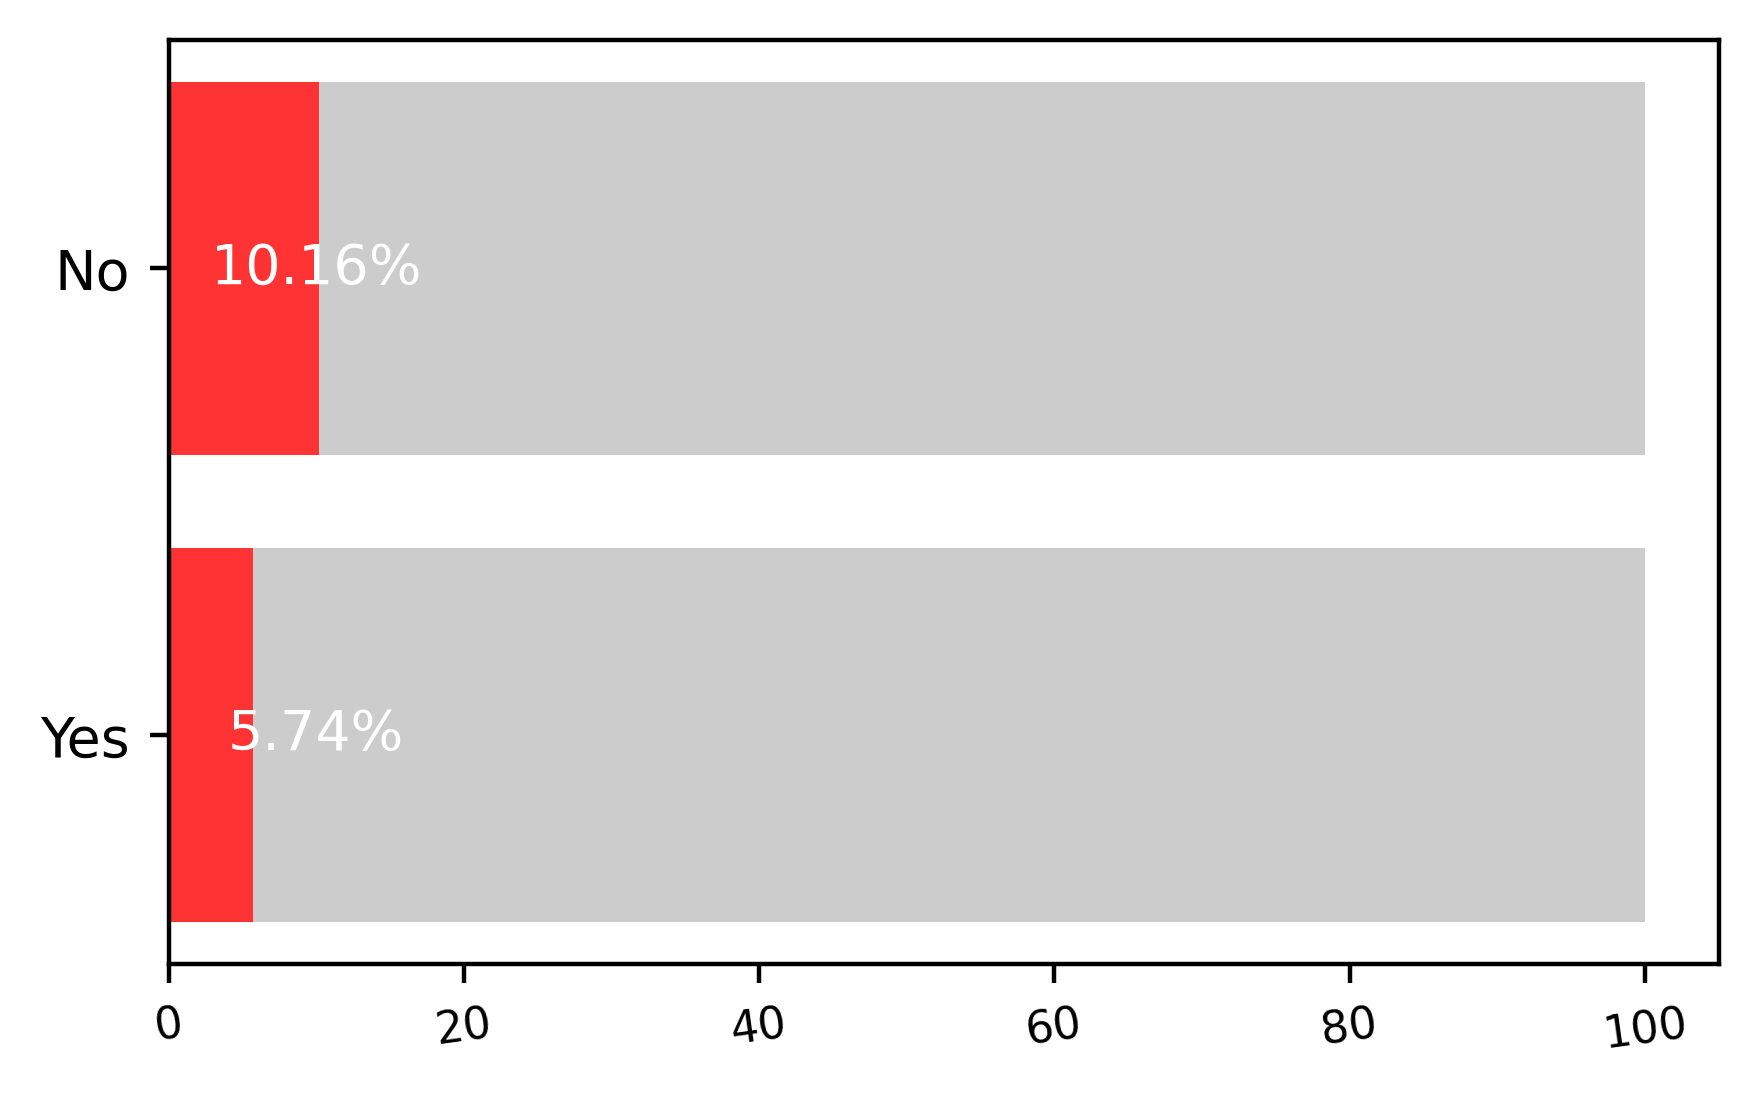

In [23]:
data_agg_viz(alcohol_consumption, 'alcohol_consumption', rotation=8, fontsize=8)

### Fruits
More than 10% of users have reported to be experiencing heart disease when they don't consume fruits.

Fruits and vegetables contain many healthful nutrients, especially fiber, which seems to help lower cholesterol and blood pressure and improve blood vessel function.

Source: [Fruits and vegetables for heart health: More is better](https://www.health.harvard.edu/heart-health/fruits-and-vegetables-for-heart-health-more-is-better)

In [24]:
fruits = data_aggregation(heart_data_cl, 'fruits')
fruits

,fruits,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,119967,12047,10.04,107920,89.96
0,No,82387,7876,9.56,74511,90.44


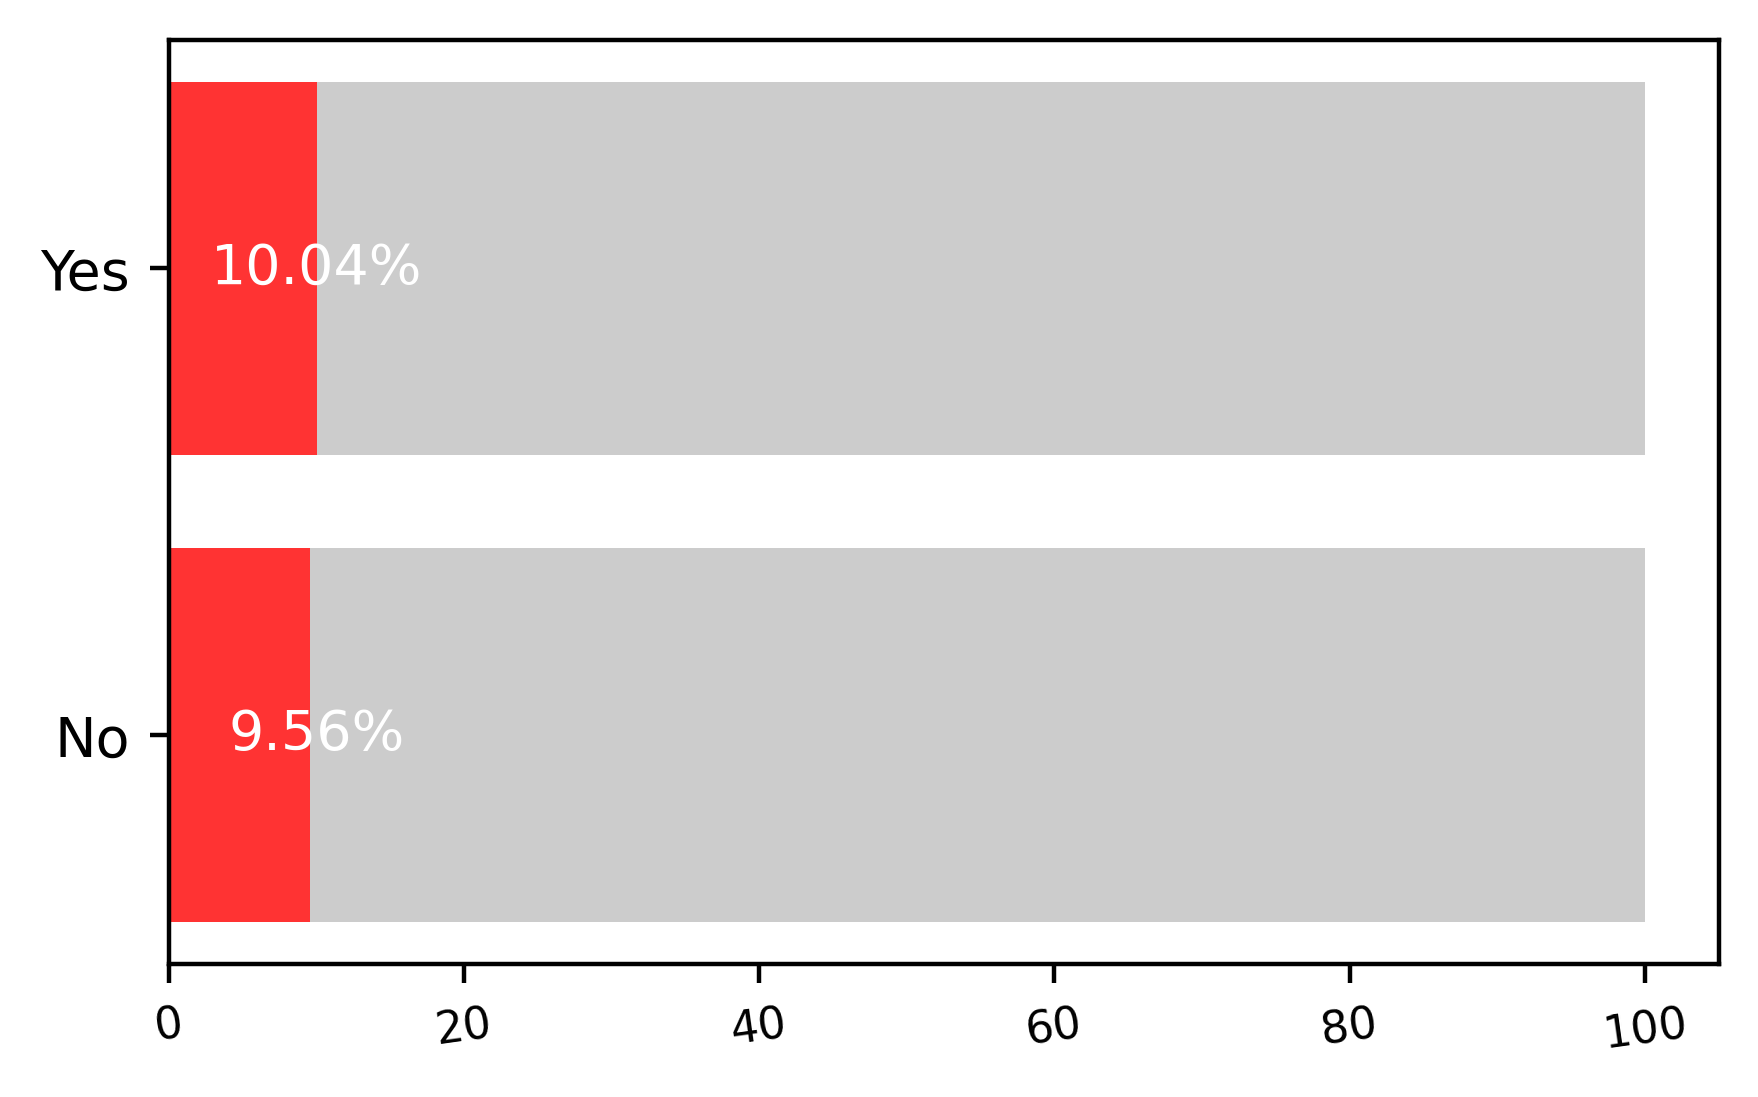

In [25]:
data_agg_viz(fruits, 'fruits', rotation=8, fontsize=8)

### Veggies

More than 10% of users have reported to be experiencing heart disease when they don't consume vegetables.

Several vegetables and their bioactive components have been proven to protect against cardiovascular diseases in clinical trials.

Source: [Effects of Vegetables on Cardiovascular Diseases and Related Mechanisms
](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5579650/)

In [26]:
veggies = data_aggregation(heart_data_cl, 'veggies')
veggies

,veggies,total_population,heart_disease,%heart_disease,no_disease,%no_disease
0,No,39370,4110,10.44,35260,89.56
1,Yes,162984,15813,9.70,147171,90.30


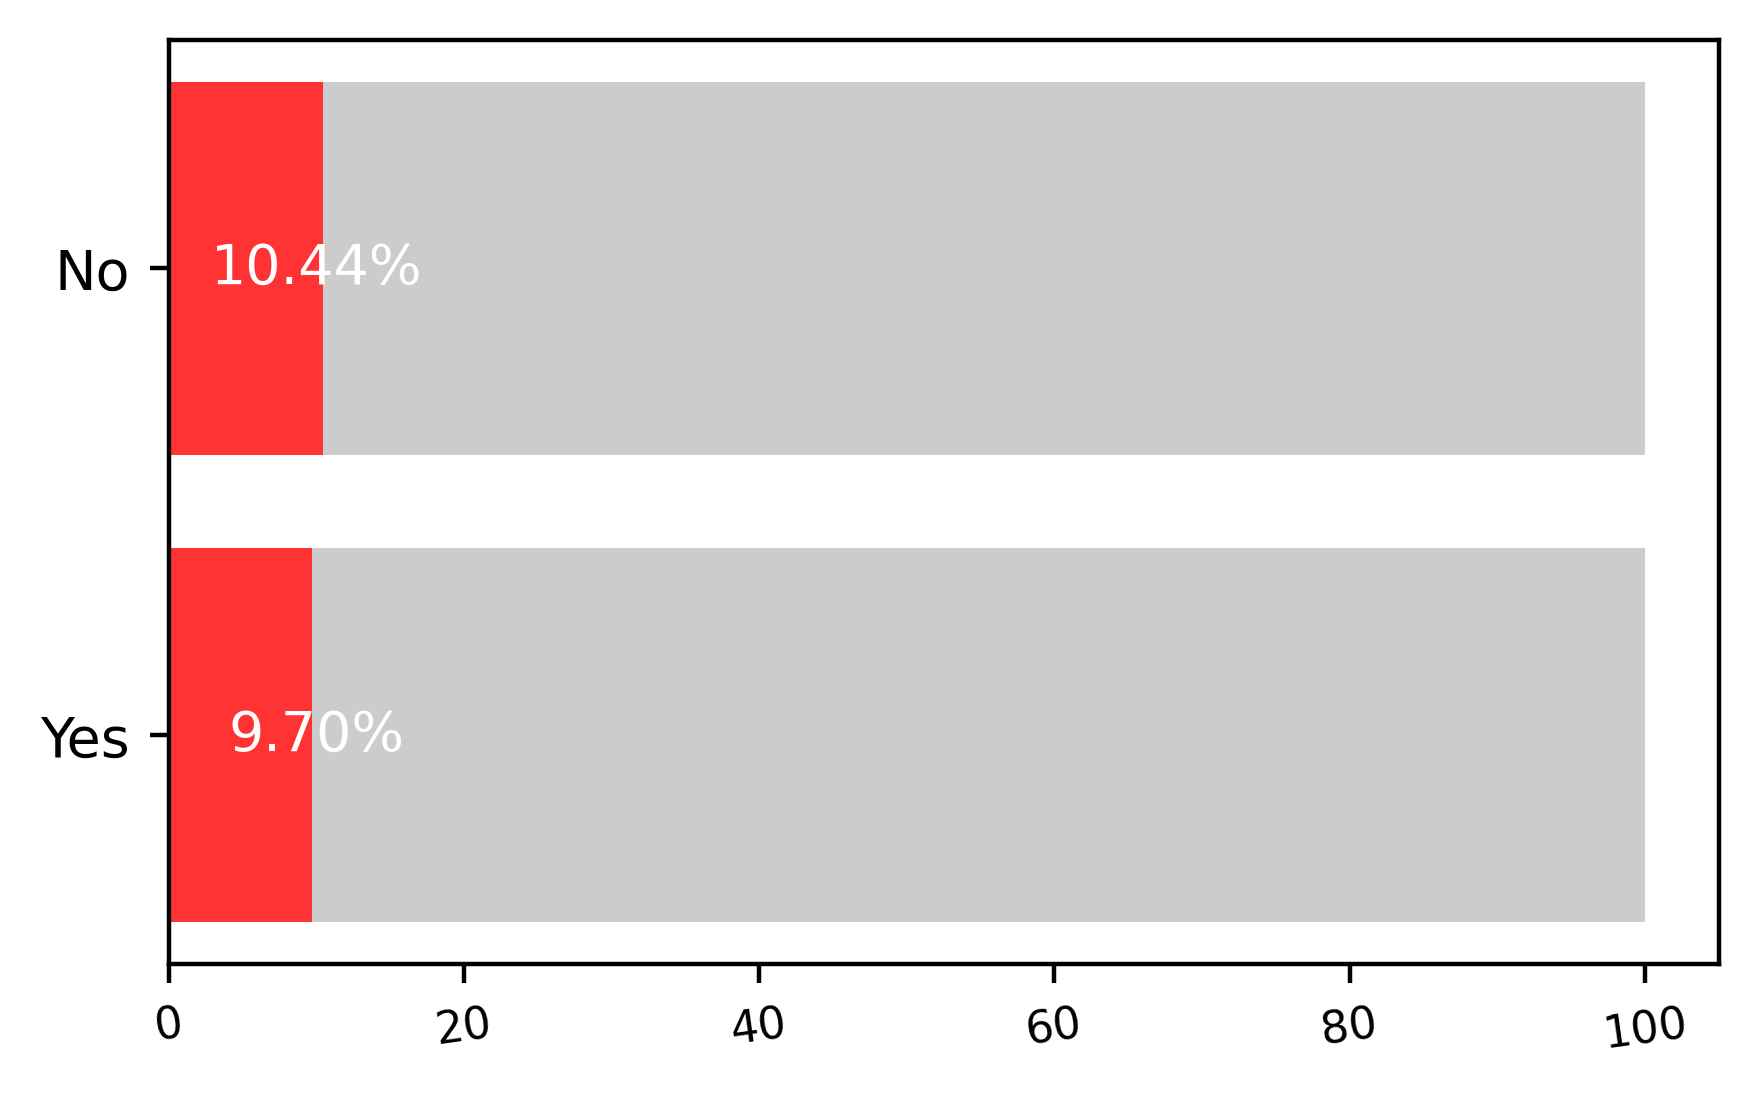

In [27]:
data_agg_viz(veggies, 'veggies', rotation=8, fontsize=8)

### Smoker

11.41% of users with heart disease reported being smokers, which is higher compared to the 9.59% reported by those without heart disease.

Chemicals in cigarette smoke cause the cells that line blood vessels to
become swollen and inflamed. This can narrow the blood vessels and can
lead to many cardiovascular conditions.

Source: [Smoking and Cardiovascular Disease](https://www.cdc.gov/tobacco/sgr/50th-anniversary/pdfs/fs_smoking_cvd_508.pdf)

In [28]:
smoker = data_aggregation(heart_data_cl, 'smoker')
smoker

,smoker,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,28604,3263,11.41,25341,88.59
0,No,173750,16660,9.59,157090,90.41


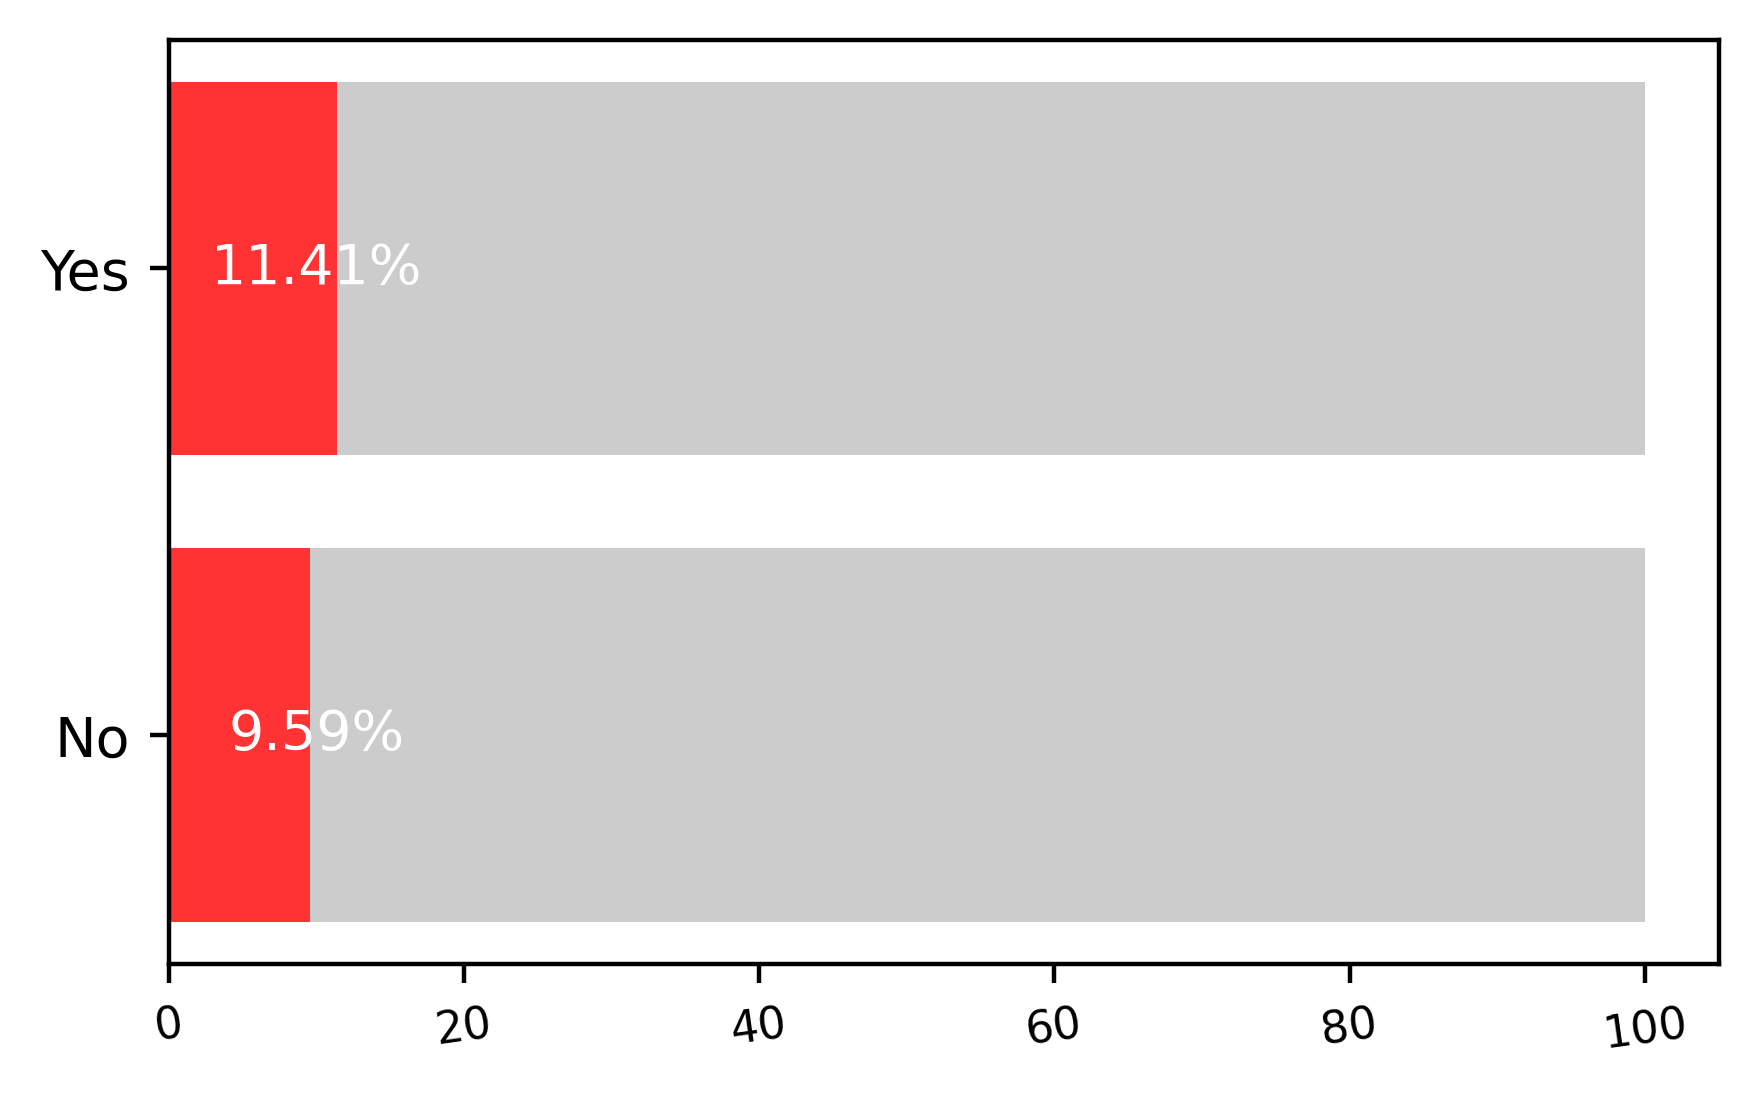

In [29]:
data_agg_viz(smoker, 'smoker', rotation=8, fontsize=8)

## Mental Health
Most of the users who have heart disease also have depressive disorder. This may be attributed to people experiencing depression over a long period of time may experience certain physiologic effects on the body increased **cardiac reactivity** (e.g., increased heart rate and blood pressure), **reduced blood flow to the heart**, and **heightened levels of cortisol**.

Source: [Heart Disease and Mental Health Disorders](https://www.cdc.gov/heartdisease/mentalhealth.htm)

### Depressed

In [30]:
depressed = data_aggregation(heart_data_cl, 'depressive_disorder') #(dataframe, column_name)
depressed

,depressive_disorder,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,47628,5106,10.72,42522,89.28
0,No,154726,14817,9.58,139909,90.42


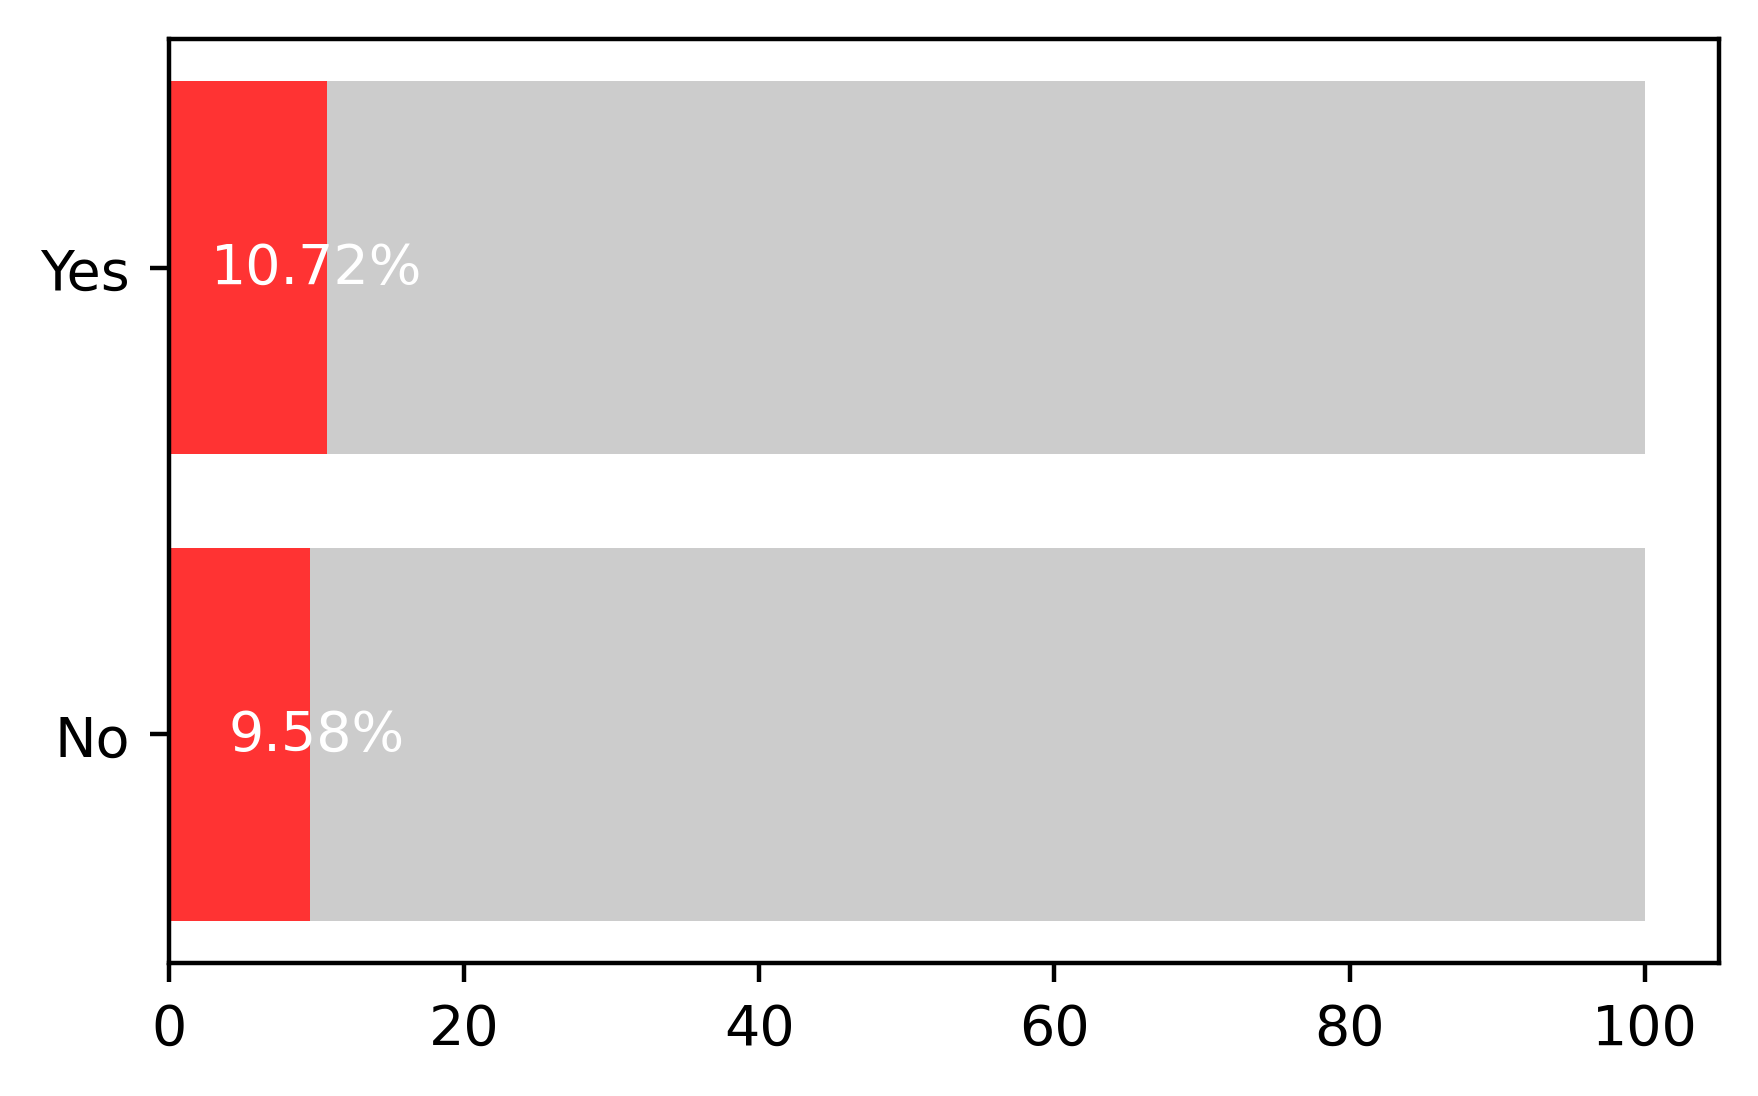

In [31]:
data_agg_viz(depressed, 'depressive_disorder')

### Mental Health Status

In [32]:
mh = data_aggregation(heart_data_cl, 'mh_status')
mh

,mh_status,total_population,heart_disease,%heart_disease,no_disease,%no_disease
2,14+ days not good,28174,3225,11.45,24949,88.55
0,0 days not good,115816,12606,10.88,103210,89.12
1,1-13 days not good,58364,4092,7.01,54272,92.99


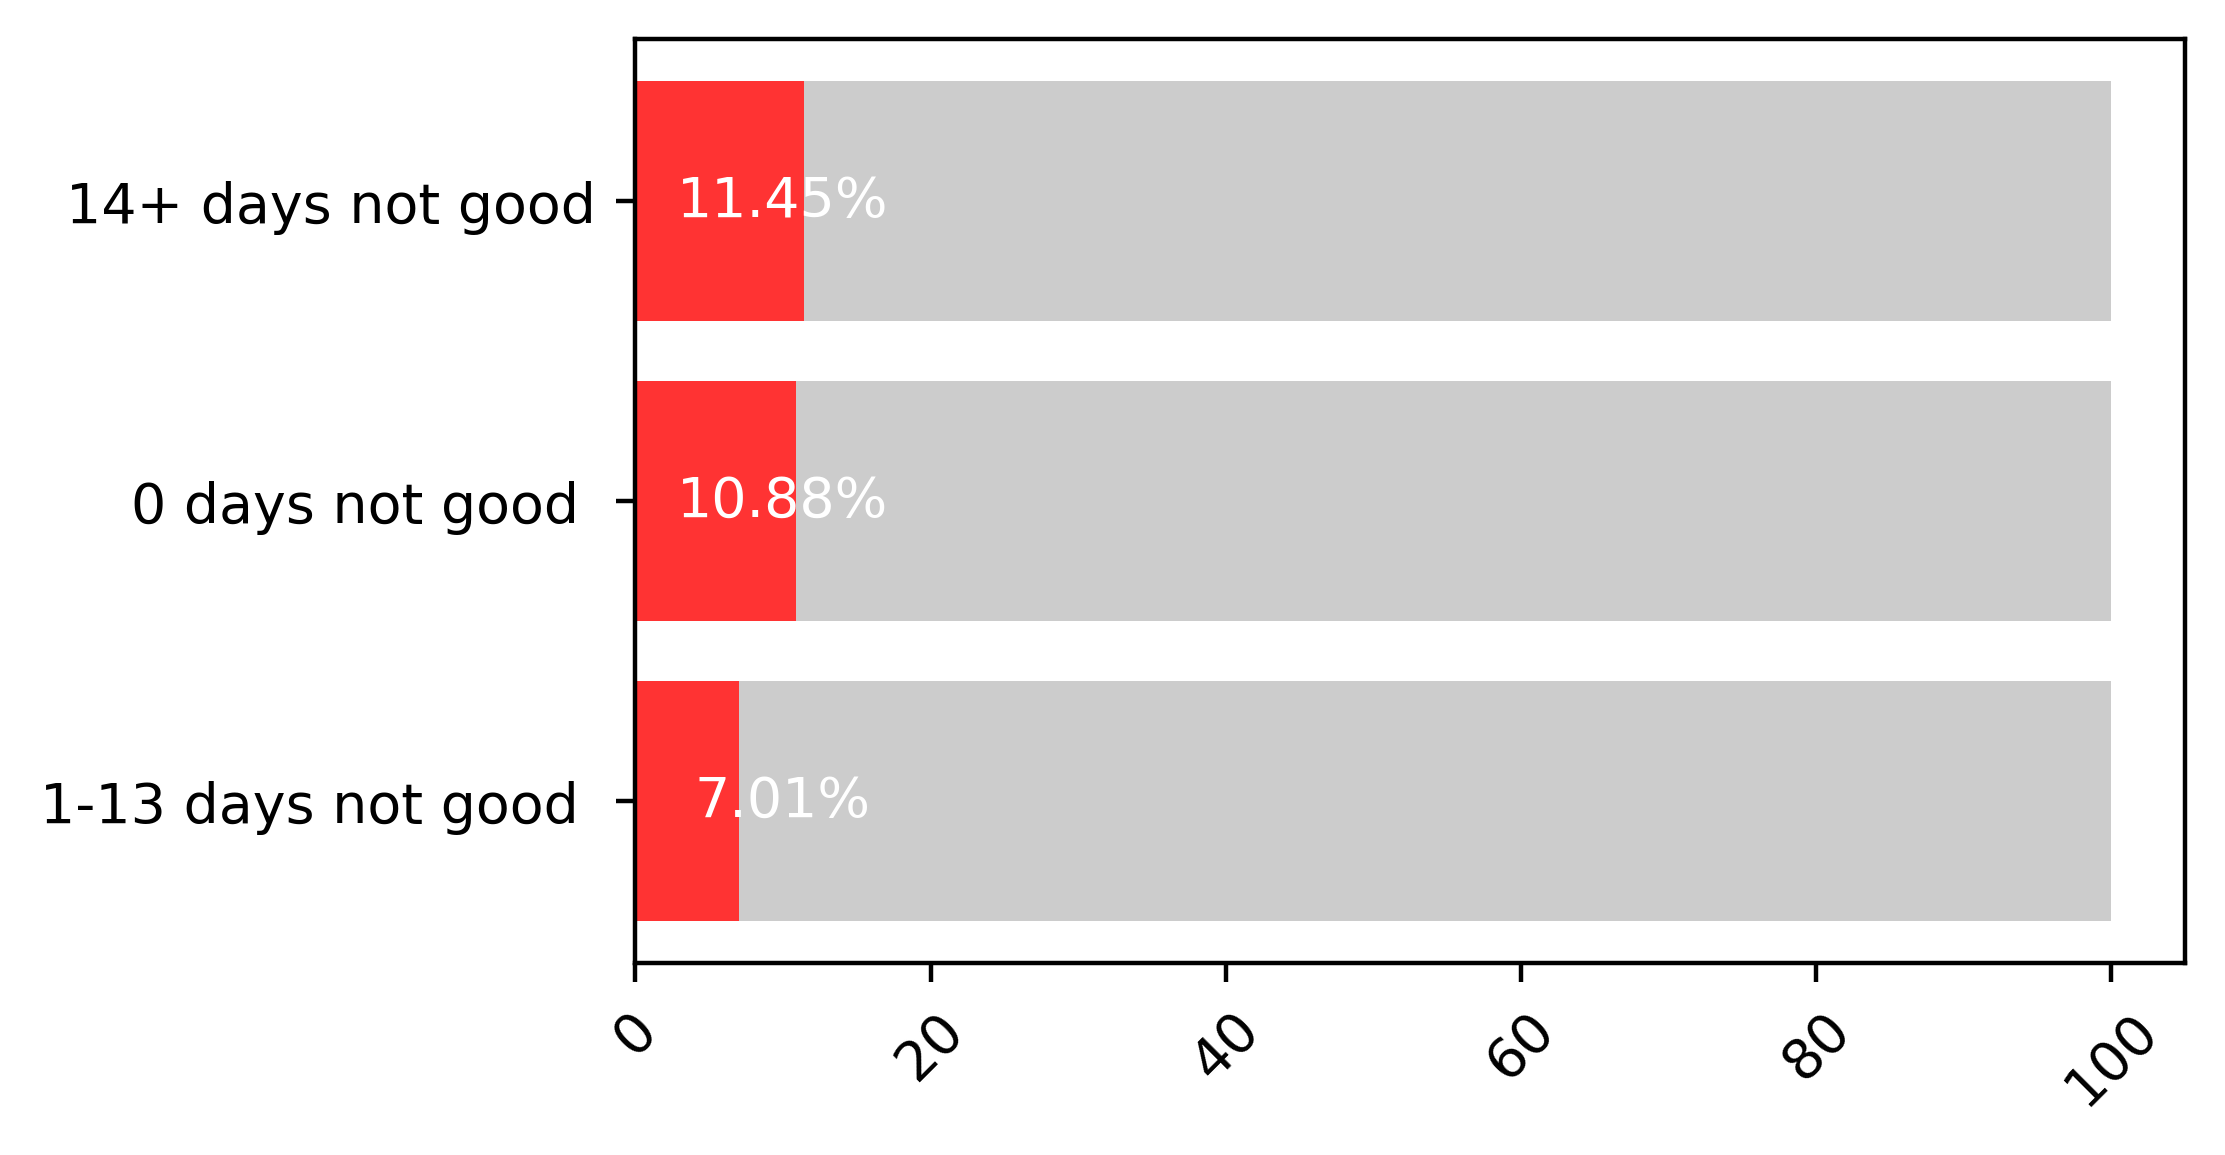

In [33]:
data_agg_viz(mh, 'mh_status', 45)

## Risk Factors

### Stroke
People with stroke are almost **more than four times as likely to have heart disease** compared to people without stroke. This could be due to 

1. **Shared risk factors**. As we have seen so far, many of the risk factors for stroke and heart disease are the same, such as **high blood pressure**, **diabetes**, and **smoking**. Having one of these risk factors increases the risk of developing both stroke and heart disease.
2. Stroke can **damage the blood vessels** in the brain and body, increasing the risk of developing **atherosclerosis** (buildup of fatty deposits in arteries) and hence heart disease.

Source: [Stroke and heart disease](https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease/stroke-and-heart-disease)

In [34]:
stroke = data_aggregation(heart_data_cl, 'stroke')
stroke

,stroke,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,9124,3065,33.59,6059,66.41
0,No,193230,16858,8.72,176372,91.28


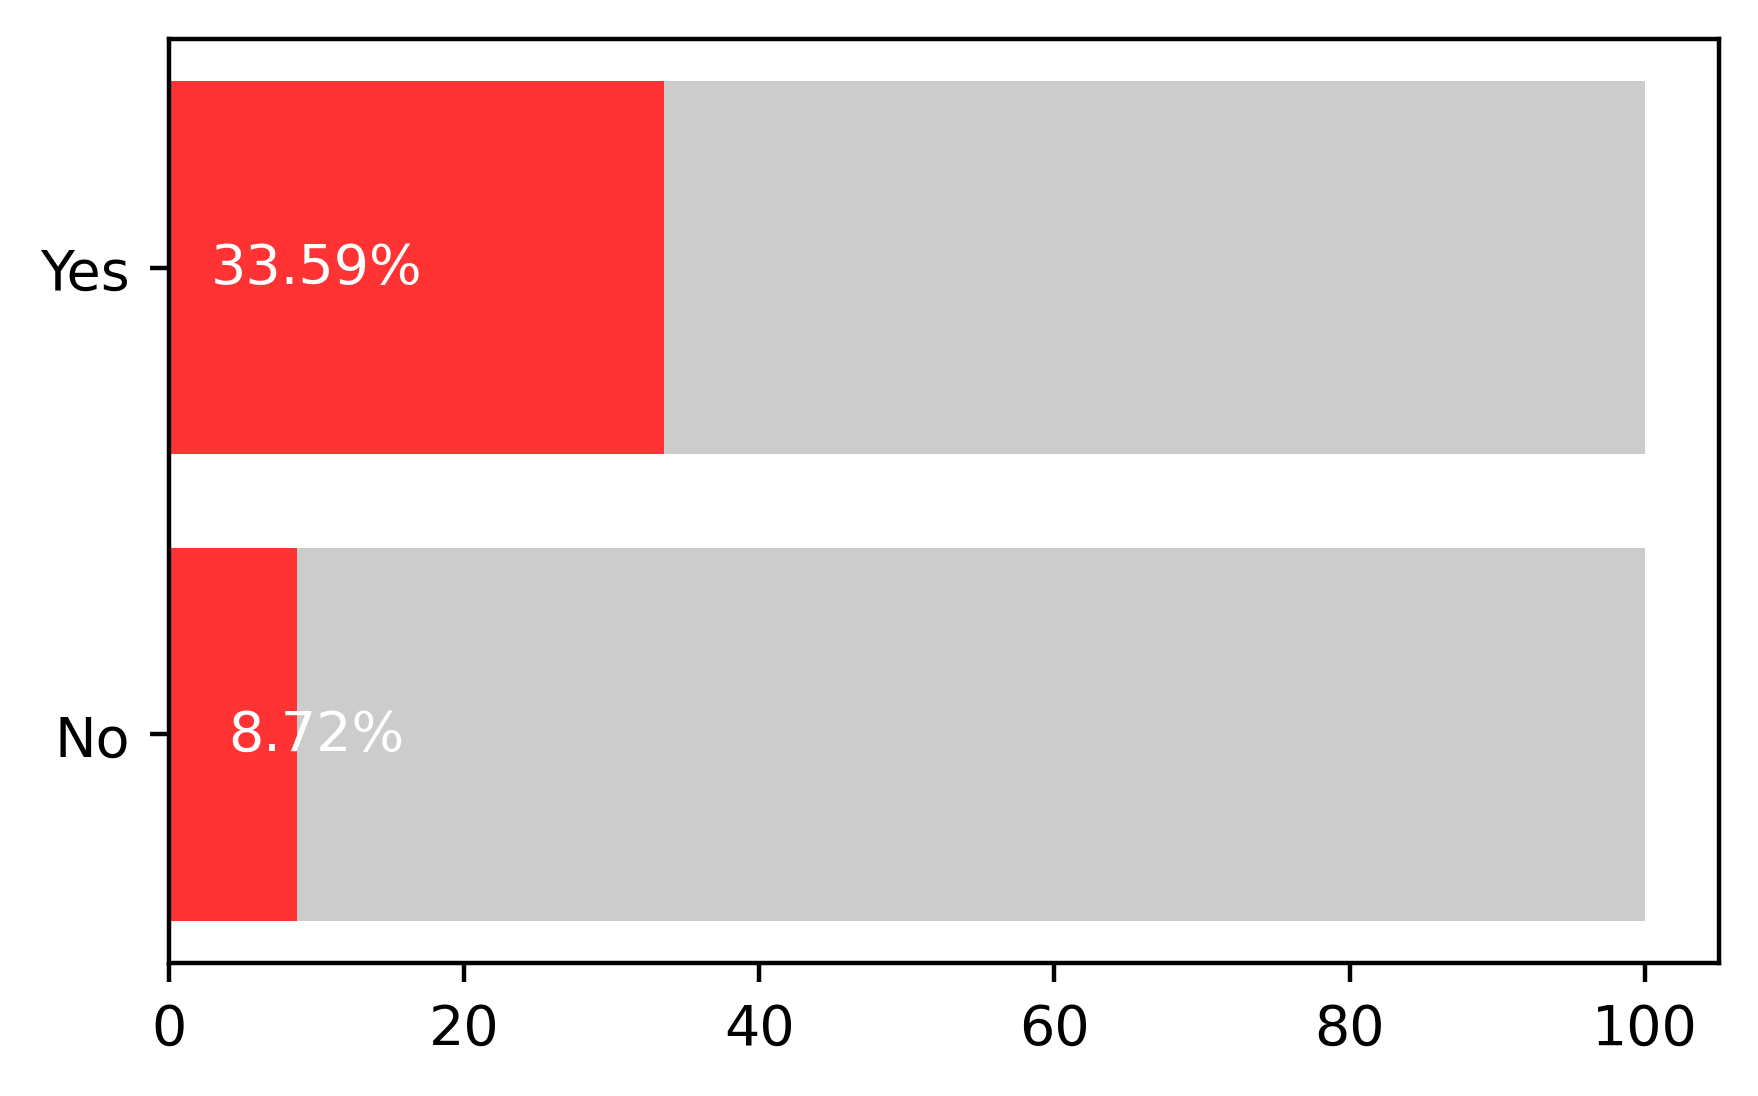

In [35]:
data_agg_viz(stroke, 'stroke')

### High Cholesterol
While our dataset shows that those without high cholesterol are more likely to be afflicted by heart disease, this is contrary to the scientific evidence on the same subject.

This is likely due to the fact that **cases of high cholesterol are often underreported**. 

A JAMA Cardiology study in 2013 found that **a significant proportion of established heart disease patients with high cholesterol were not aware of their condition** and were not receiving treatment, highlighting the need for improved efforts to identify high cholesterol. 

Source: [Combining body mass index with measures of central obesity in the assessment of mortality in subjects with coronary disease: role of "normal weight central obesity](https://pubmed.ncbi.nlm.nih.gov/23369419/)

In [36]:
high_chol = data_aggregation(heart_data_cl, 'high_chol')
high_chol

,high_chol,total_population,heart_disease,%heart_disease,no_disease,%no_disease
0,No,84931,13360,15.73,71571,84.27
1,Yes,117423,6563,5.59,110860,94.41


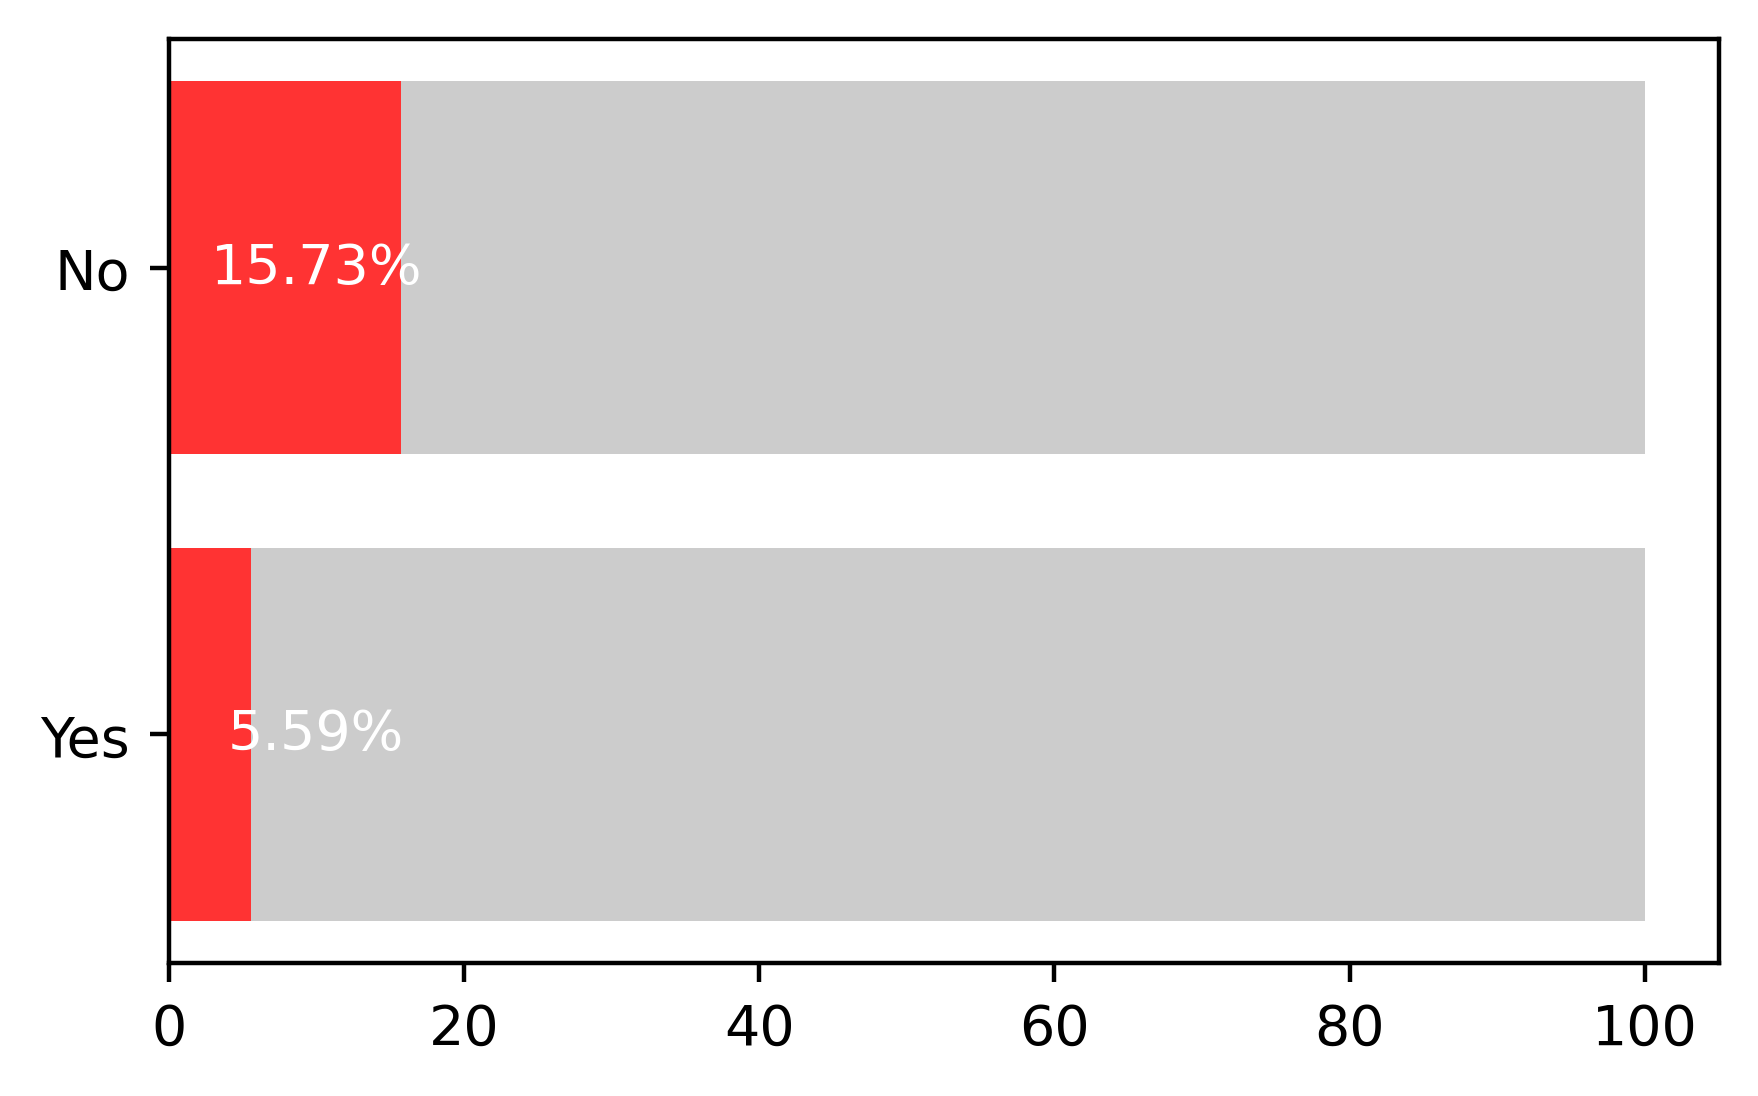

In [37]:
data_agg_viz(high_chol, 'high_chol')

### High Blood Pressure

People with high blood pressure are **more than four times as likely to have heart disease compared to people without high blood pressure**. This could be due to 

1. **Increased workload on the heart**, forcing the heart to work harder to pump blood leading to an enlarged heart, weakening of the heart muscle, and eventually heart failure.
2. **Increased risk of blood clots**, which can lead to heart attack or stroke, which itself is a likely indicator of heart disease.

Source: [High blood pressure (hypertension)](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410)

In [38]:
high_bp = data_aggregation(heart_data_cl, 'high_bp')
high_bp

,high_bp,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,89941,14804,16.46,75137,83.54
0,No,112413,5119,4.55,107294,95.45


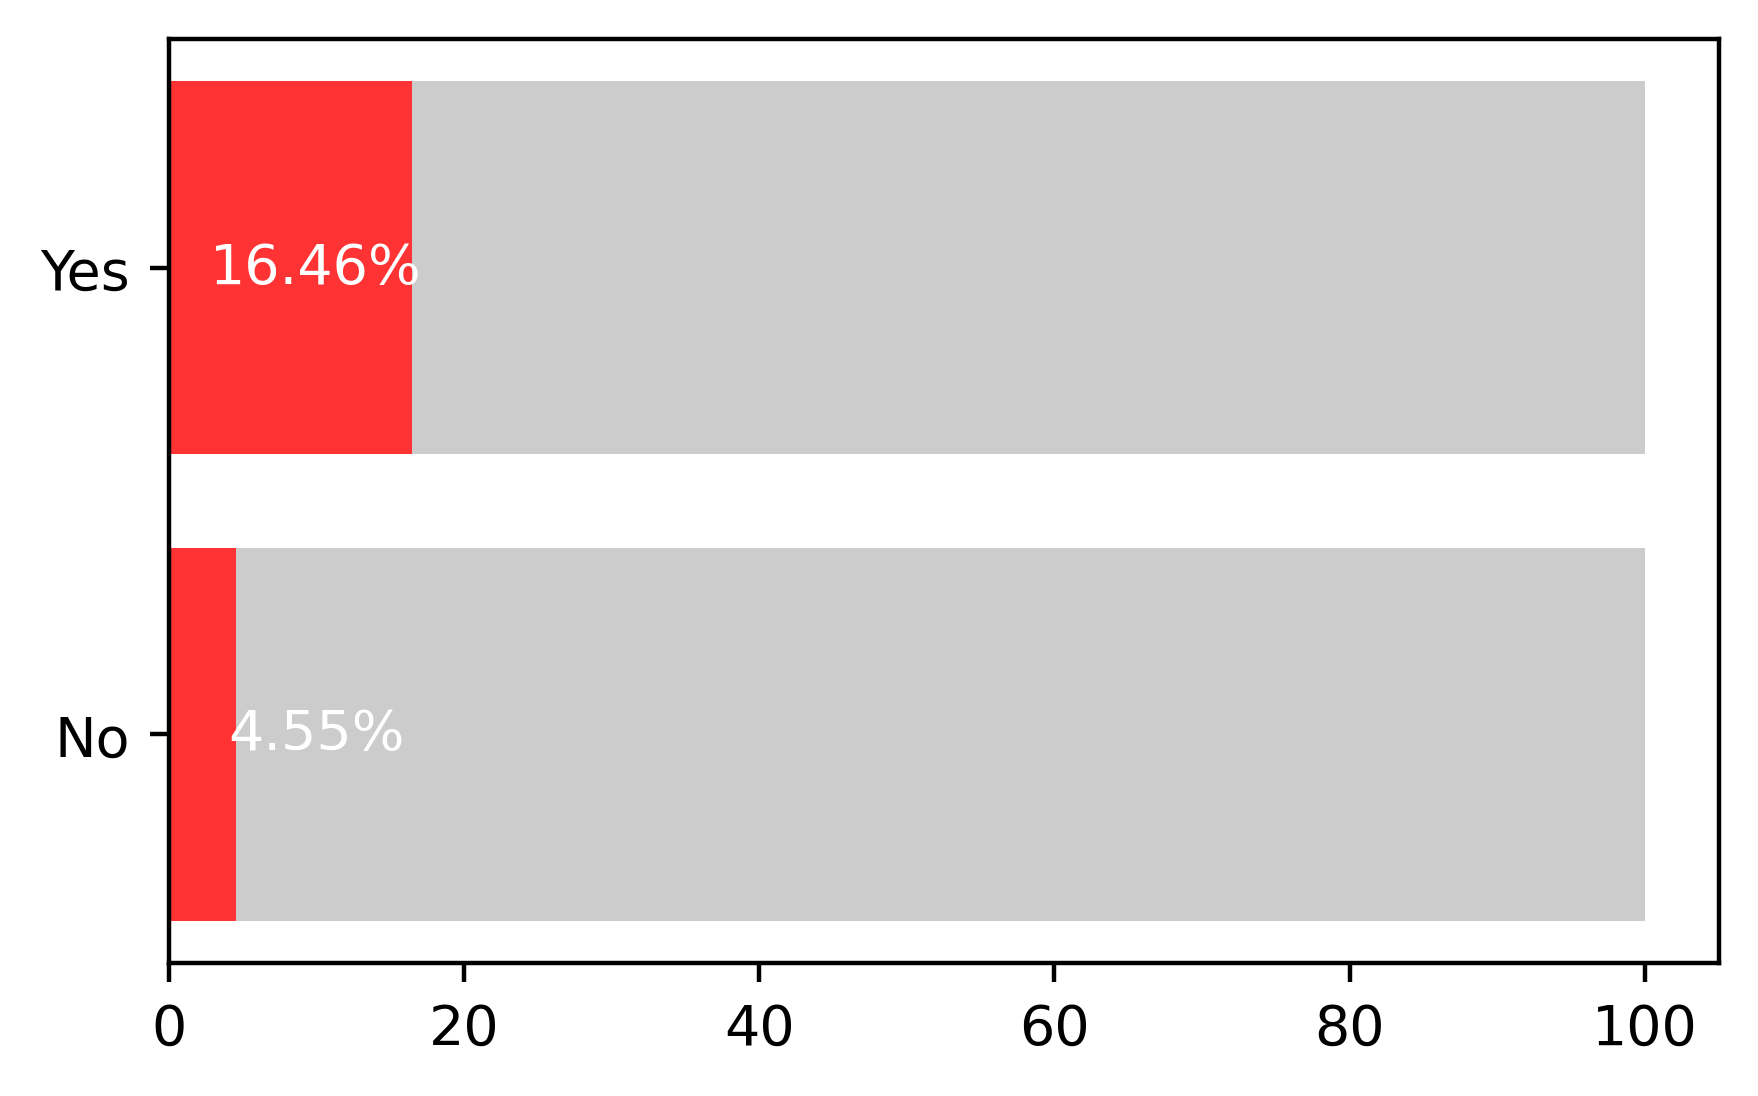

In [39]:
data_agg_viz(high_bp, 'high_bp')

#### Combination of Stroke, High BP, and High Cholesterol

In [40]:
risk_factors = {
    'Stroke': [stroke.loc[stroke['stroke'] == 'Yes', '%heart_disease'].values[0],
                                 stroke.loc[stroke['stroke'] == 'Yes', '%no_disease'].values[0]],
    'High BP': [high_bp.loc[high_bp['high_bp'] == 'Yes', '%heart_disease'].values[0],
                             high_bp.loc[high_bp['high_bp'] == 'Yes', '%no_disease'].values[0]],
    'High Cholesterol': [high_chol.loc[high_chol['high_chol'] == 'Yes', '%heart_disease'].values[0],
                               high_chol.loc[high_chol['high_chol'] == 'Yes', '%no_disease'].values[0]]
}

risk_factors_df = pd.DataFrame(risk_factors, index=['%heart_disease', '%no_disease'])
risk_factors_df

,Stroke,High BP,High Cholesterol
%heart_disease,33.59,16.46,5.59
%no_disease,66.41,83.54,94.41


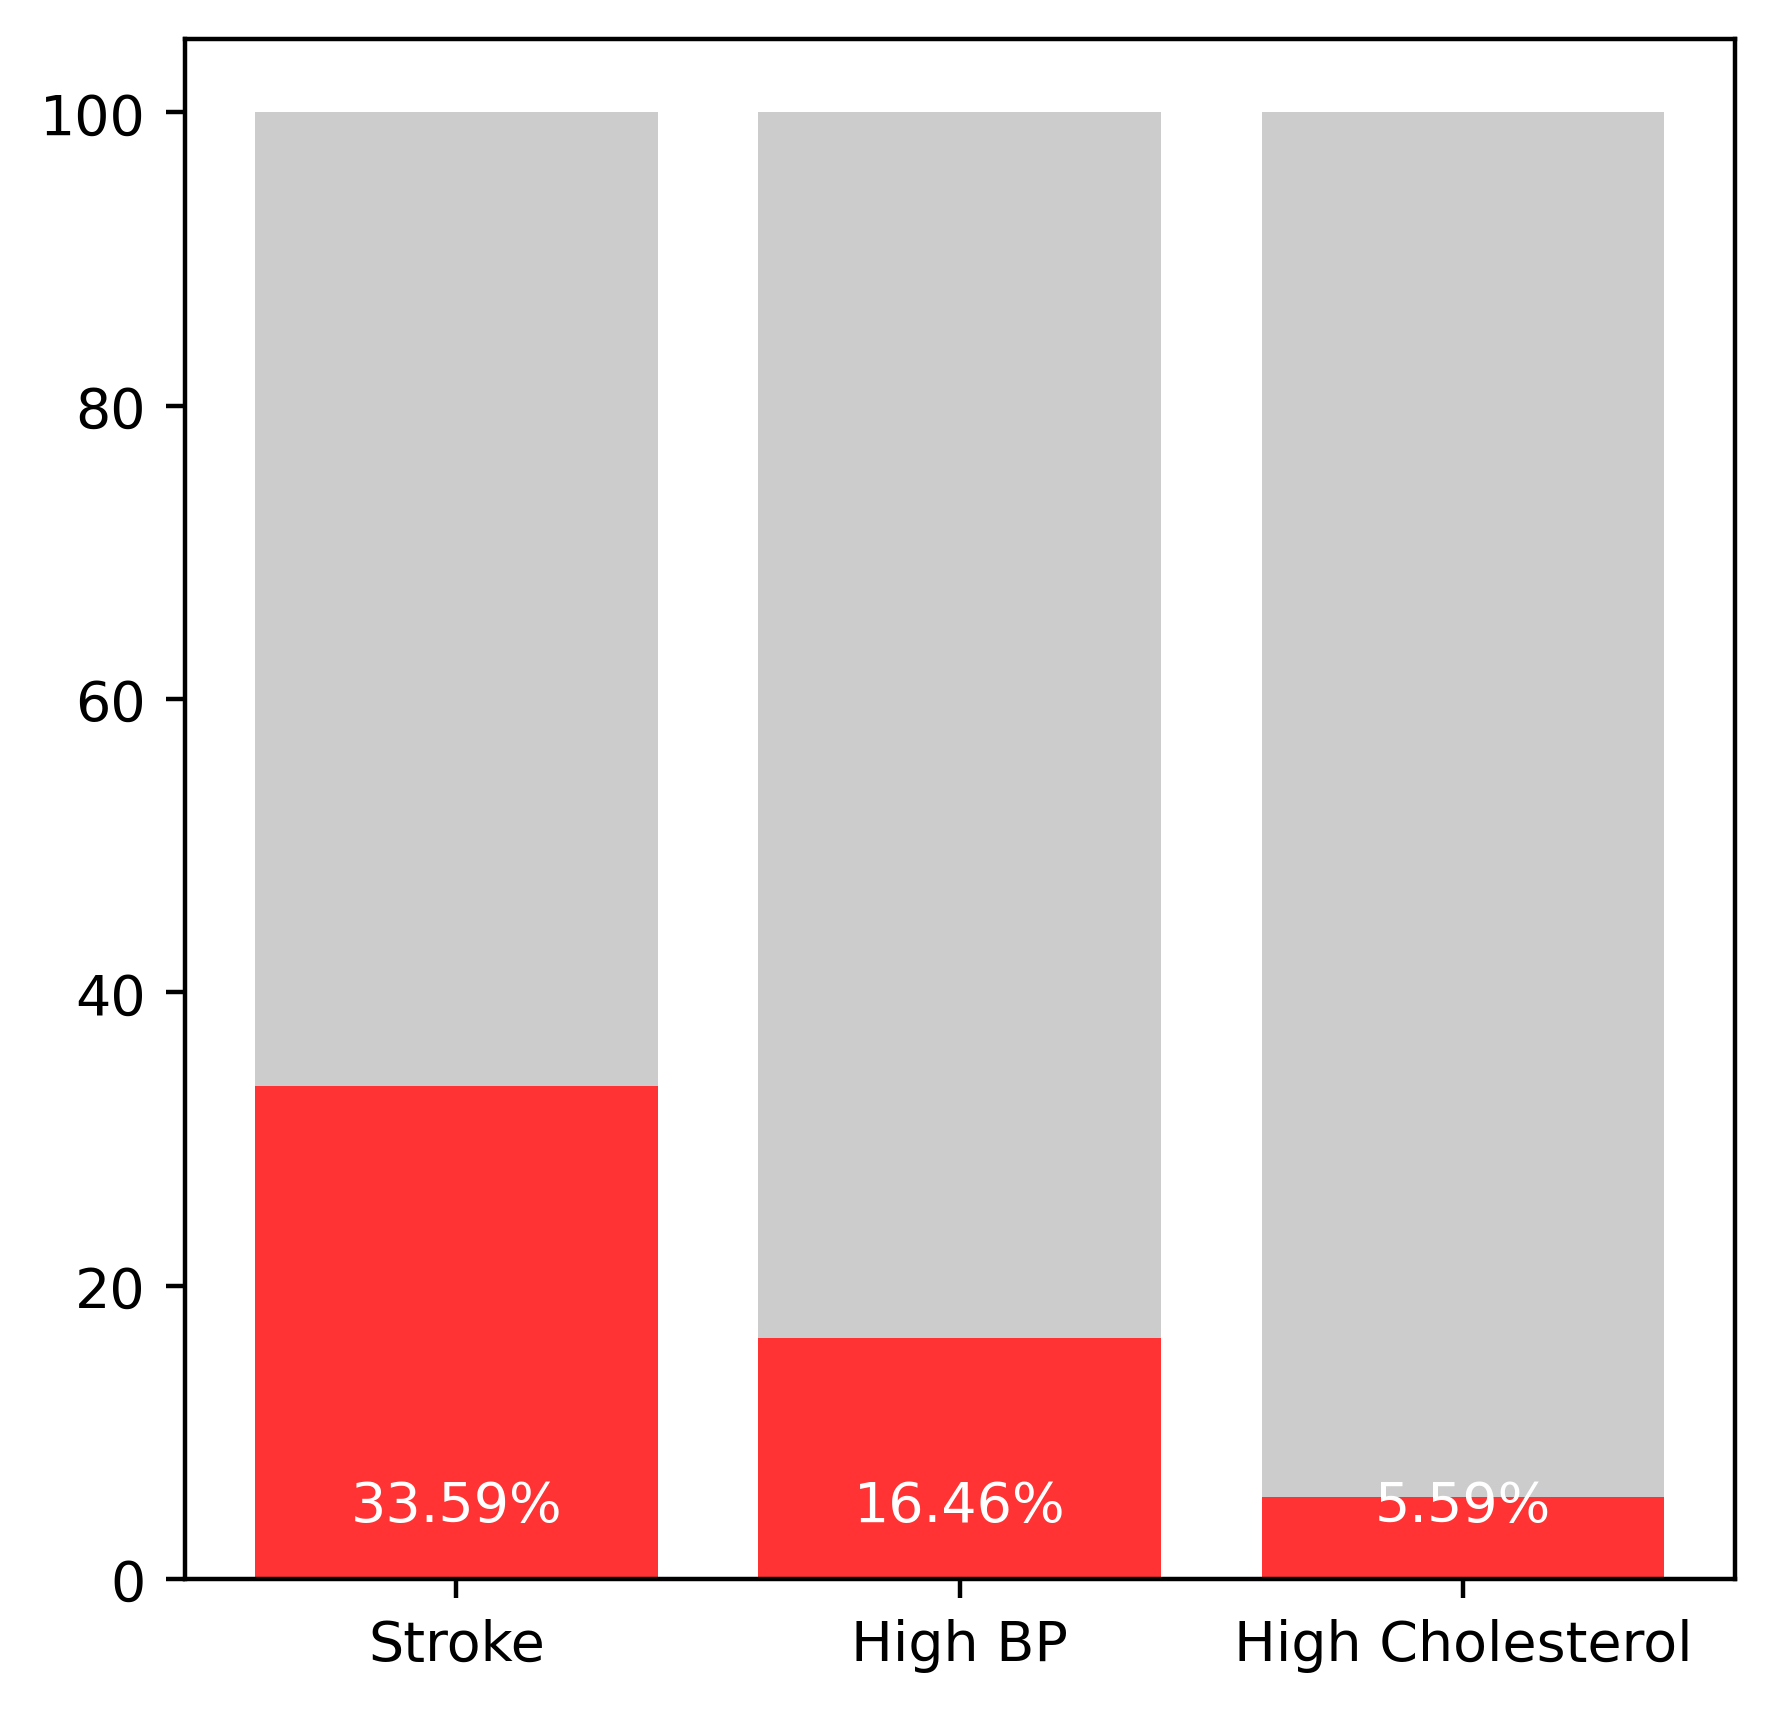

In [41]:
# Set figure size
fig, ax = plt.subplots(figsize=(5, 5), dpi=400)

# Define the data
x = risk_factors_df.columns
y1 = risk_factors_df.iloc[0]
y2 = 100 - y1

# Plot the stacked bars
ax.bar(x, y1, color='#FF3333', label='Heart Disease')
ax.bar(x, y2, bottom=y1, color='#CCCCCC', label='No Heart Disease')

# Add labels to the bars
for i, v in enumerate(y1):
    ax.text(i, (v + y2[i]) / 20, f"{v:.2f}%", color='white', ha='center', va='center')

# Rotate x labels
plt.xticks(rotation=0, fontsize=10)

plt.show()

### BMI
**1 in 10 people with Class 2 Obesity experienced heart disease**

The extra weight in obese people forces the heart to do more work. It can also cause problems by increasing the risk of developing many other factors that make heart disease more likely. High blood pressure, unhealthy cholesterol levels, and even diabetes have been linked to obesity. 

Underweight individuals are at risk for cardiac abnormalities. Regular heart rhythm depends on a proper balance of minerals such as potassium, sodium and calcium inside and outside of the heart muscle cells. The chronic malnutrition associated with a low BMI disrupts this balance. Furthermore, an insufficient diet can cause the body to break down heart muscle to use for energy, further weakening your heart.

Source: 
* [The Connection between Obesity and Cardiovascular Disease](https://www.slma.cc/the-connection-between-obesity-and-cardiovascular-disease/)
* [Health Risks of a Low BMI](https://healthyeating.sfgate.com/health-risks-low-bmi-5687.html)

In [42]:
bmi = data_aggregation(heart_data_cl, 'bmi_category')
bmi

,bmi_category,total_population,heart_disease,%heart_disease,no_disease,%no_disease
2,Obese 2,22060,2396,10.86,19664,89.14
1,Obese 1,48001,5103,10.63,42898,89.37
4,Overweight,67941,6894,10.15,61047,89.85
3,Obese 3,15596,1578,10.12,14018,89.88
5,Underweight,2740,239,8.72,2501,91.28
0,Normal,46016,3713,8.07,42303,91.93


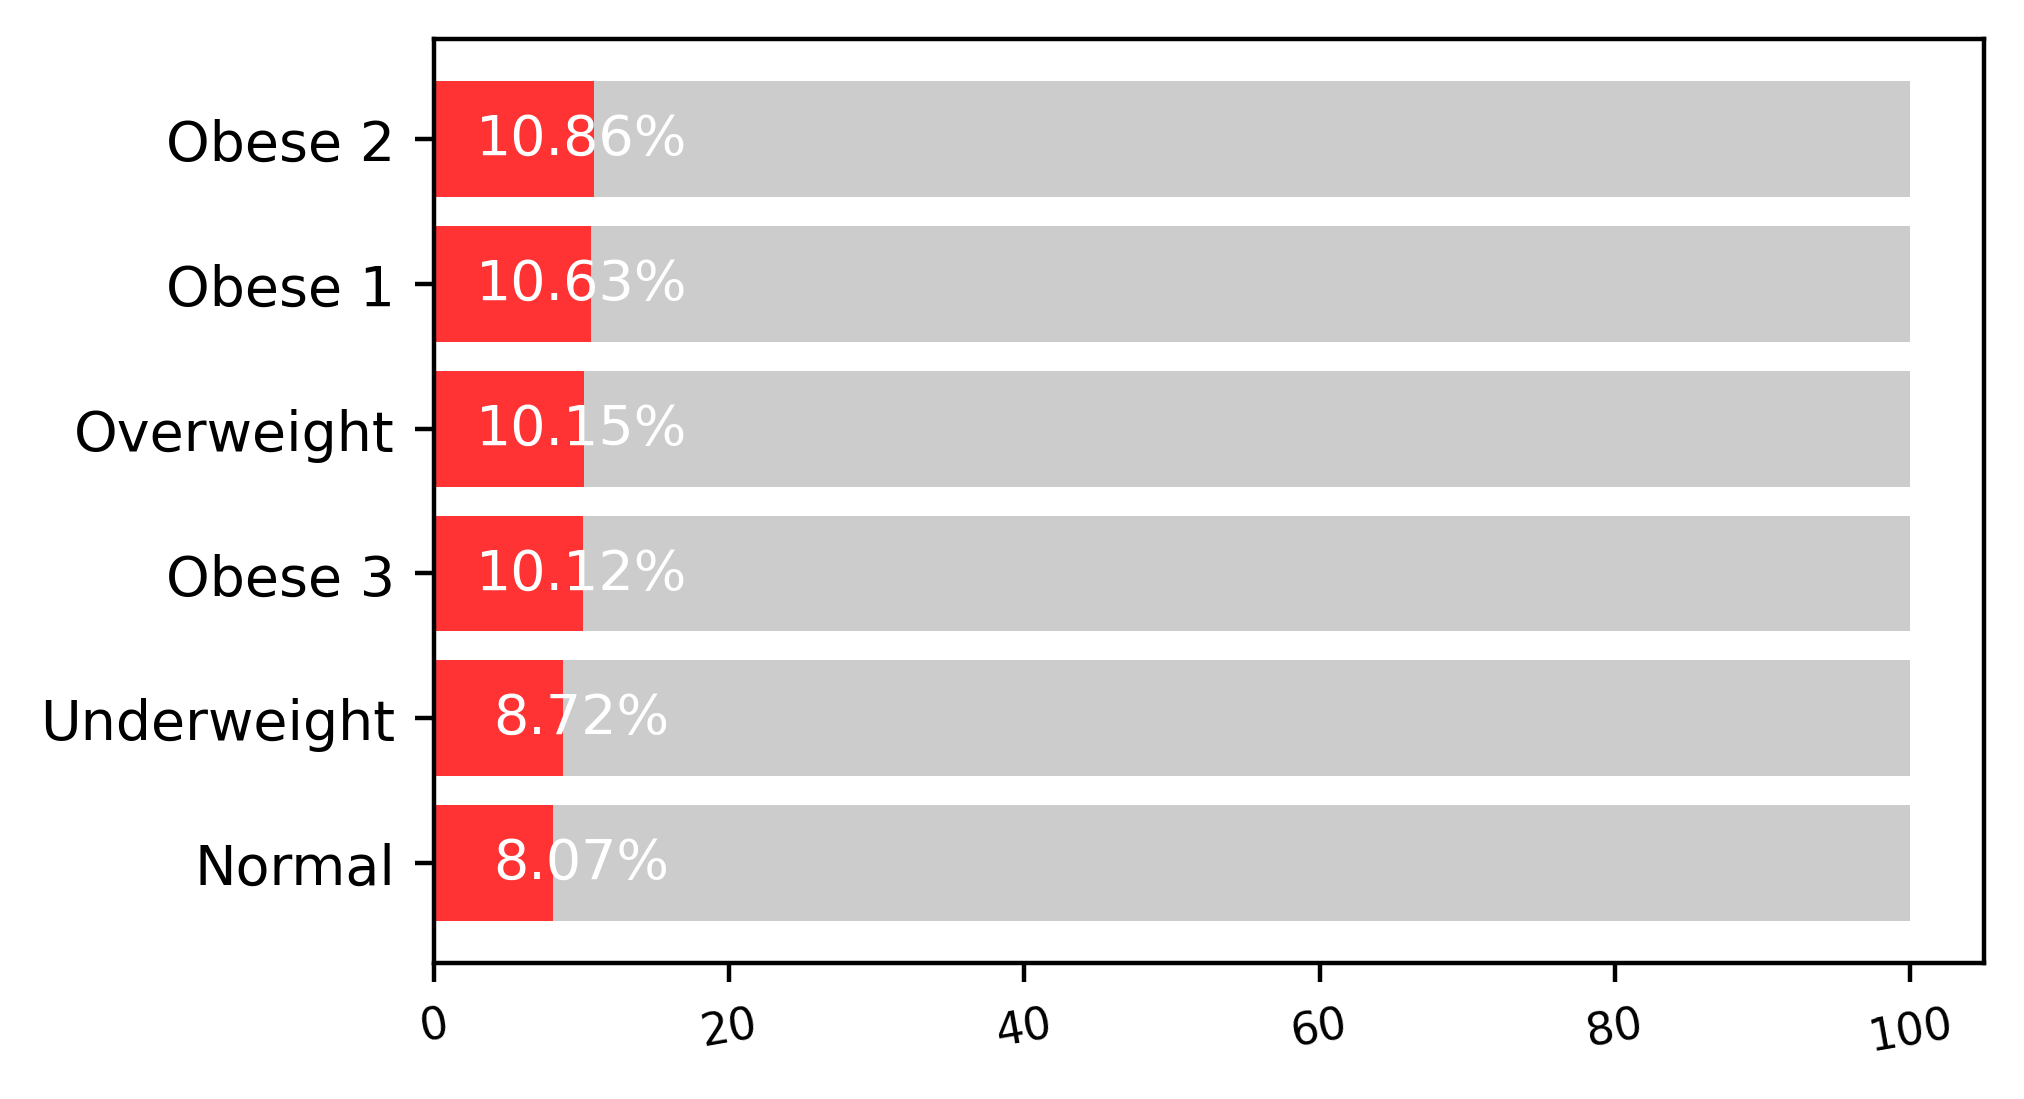

In [43]:
data_agg_viz(bmi, 'bmi_category', rotation=10, fontsize=8)

### Diabetes
People with diabetes are **more than twice as likely to have heart disease compared to people without diabetes**. This could be because diabetes contributes to 

1. **High blood glucose levels**, which can damage the blood vessels and lead to atherosclerosis (hardening and narrowing of the arteries)
2. **High blood pressure**, which is a major risk factor for heart disease.

Source: [Diabetes and Cardiovascular Disease](https://www.diabetes.org/diabetes/complications/cardiovascular-disease)

In [44]:
diabetes = data_aggregation(heart_data_cl, 'diabetes_category')
diabetes

,diabetes_category,total_population,heart_disease,%heart_disease,no_disease,%no_disease
0,Existing Diabetes,32643,6890,21.11,25753,78.89
2,Pre-Diabetes/Borderline,5551,658,11.85,4893,88.15
1,No or During Pregnancy,164160,12375,7.54,151785,92.46


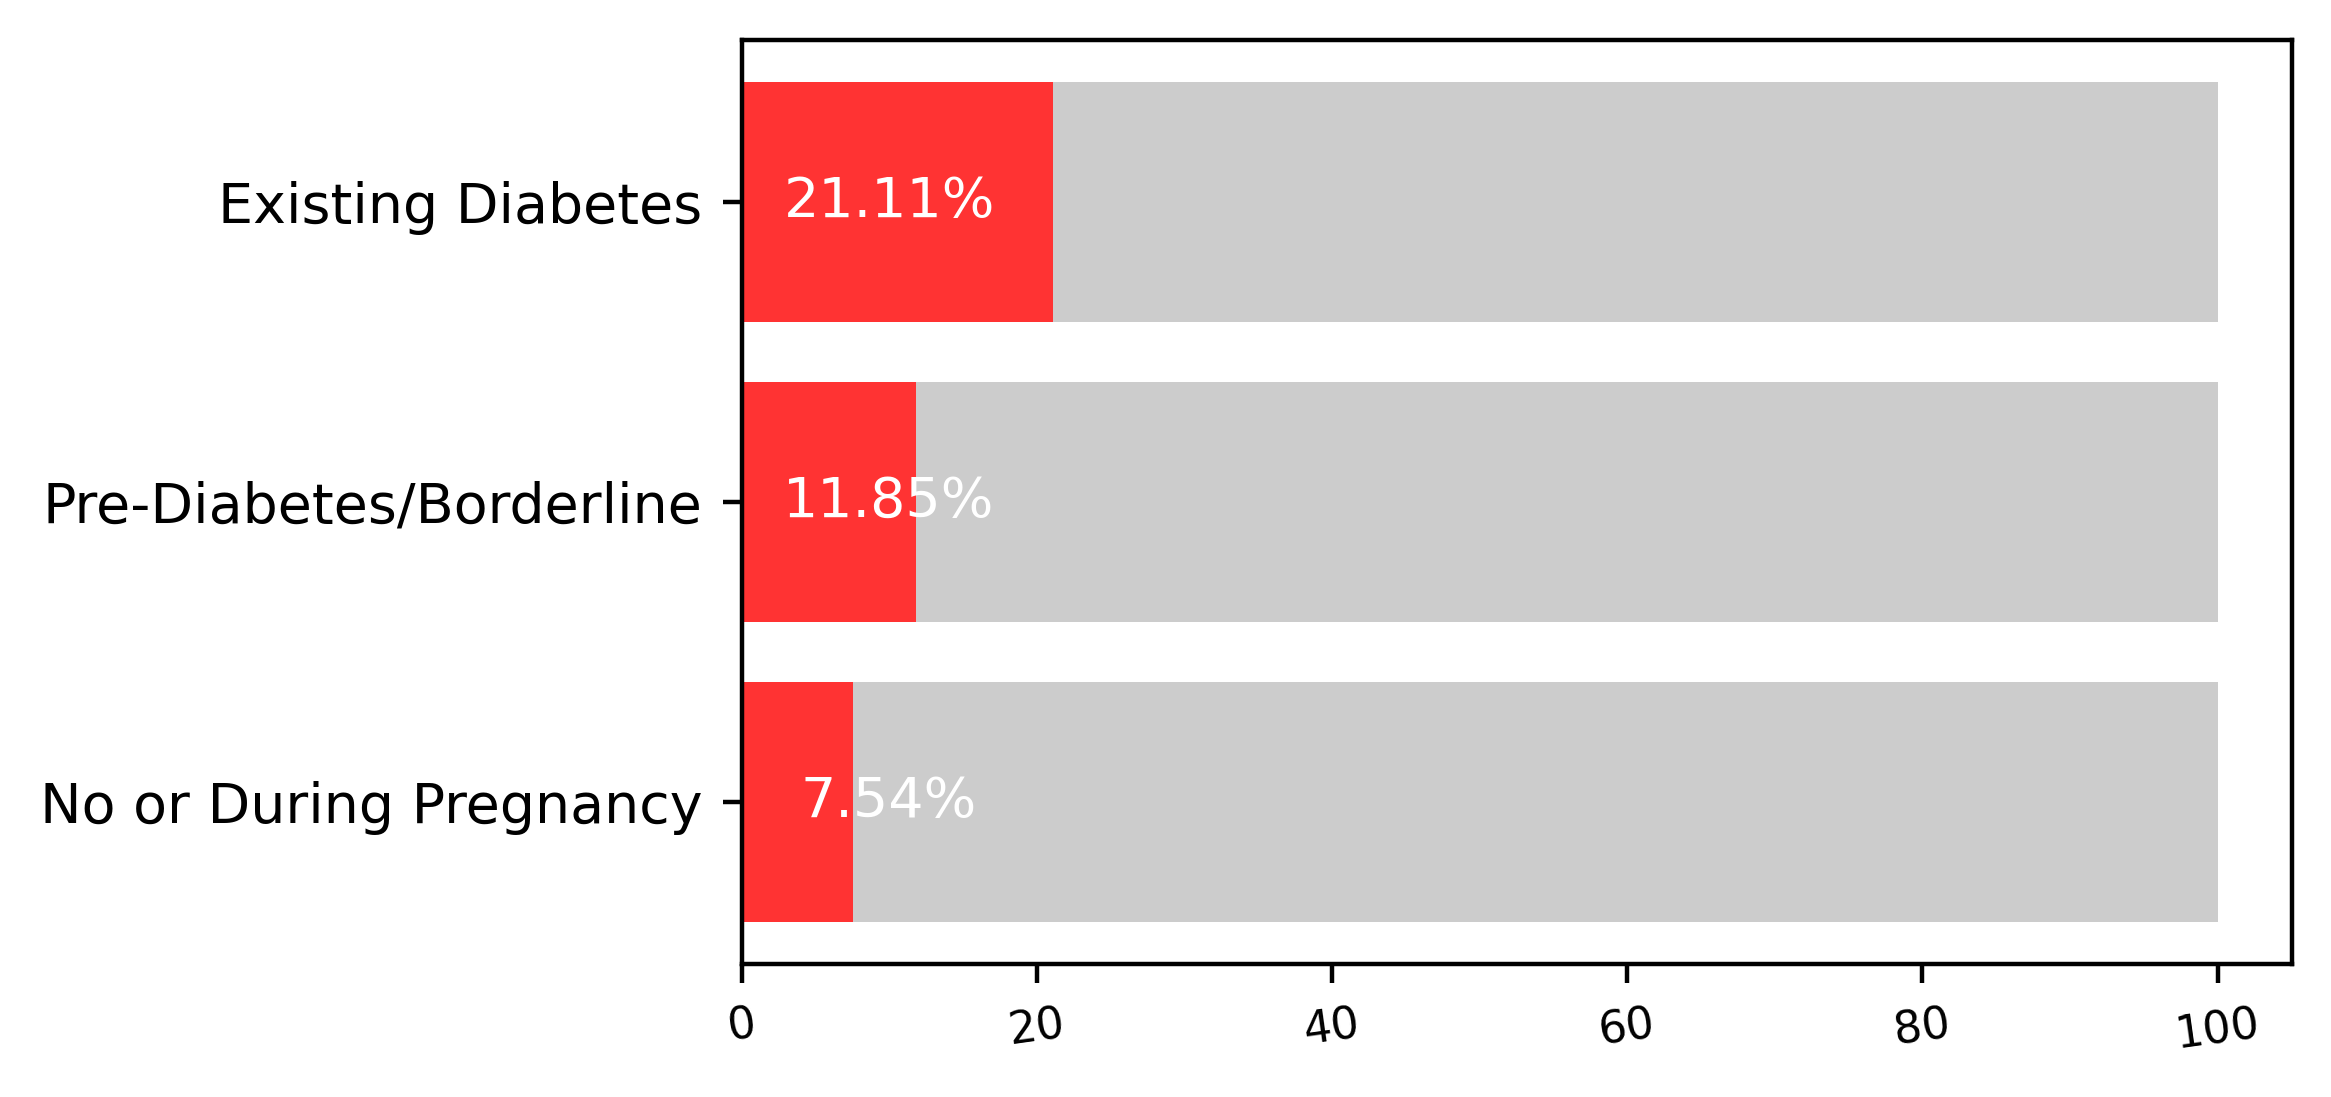

In [45]:
data_agg_viz(diabetes, 'diabetes_category', rotation=8, fontsize=8)

## Healthcare Access

### Health Insurance
**1 in 10 people that have health insurance experienced heart disease**

Even with health insurance, individuals may face barriers to accessing appropriate medical care and follow-up. Also, they may not prioritize preventive health measures which can help identify and manage risk factors for heart disease.

In [46]:
health_insurance = data_aggregation(heart_data_cl, 'health_insurance')
health_insurance

,health_insurance,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,193595,19478,10.06,174117,89.94
0,No,8759,445,5.08,8314,94.92


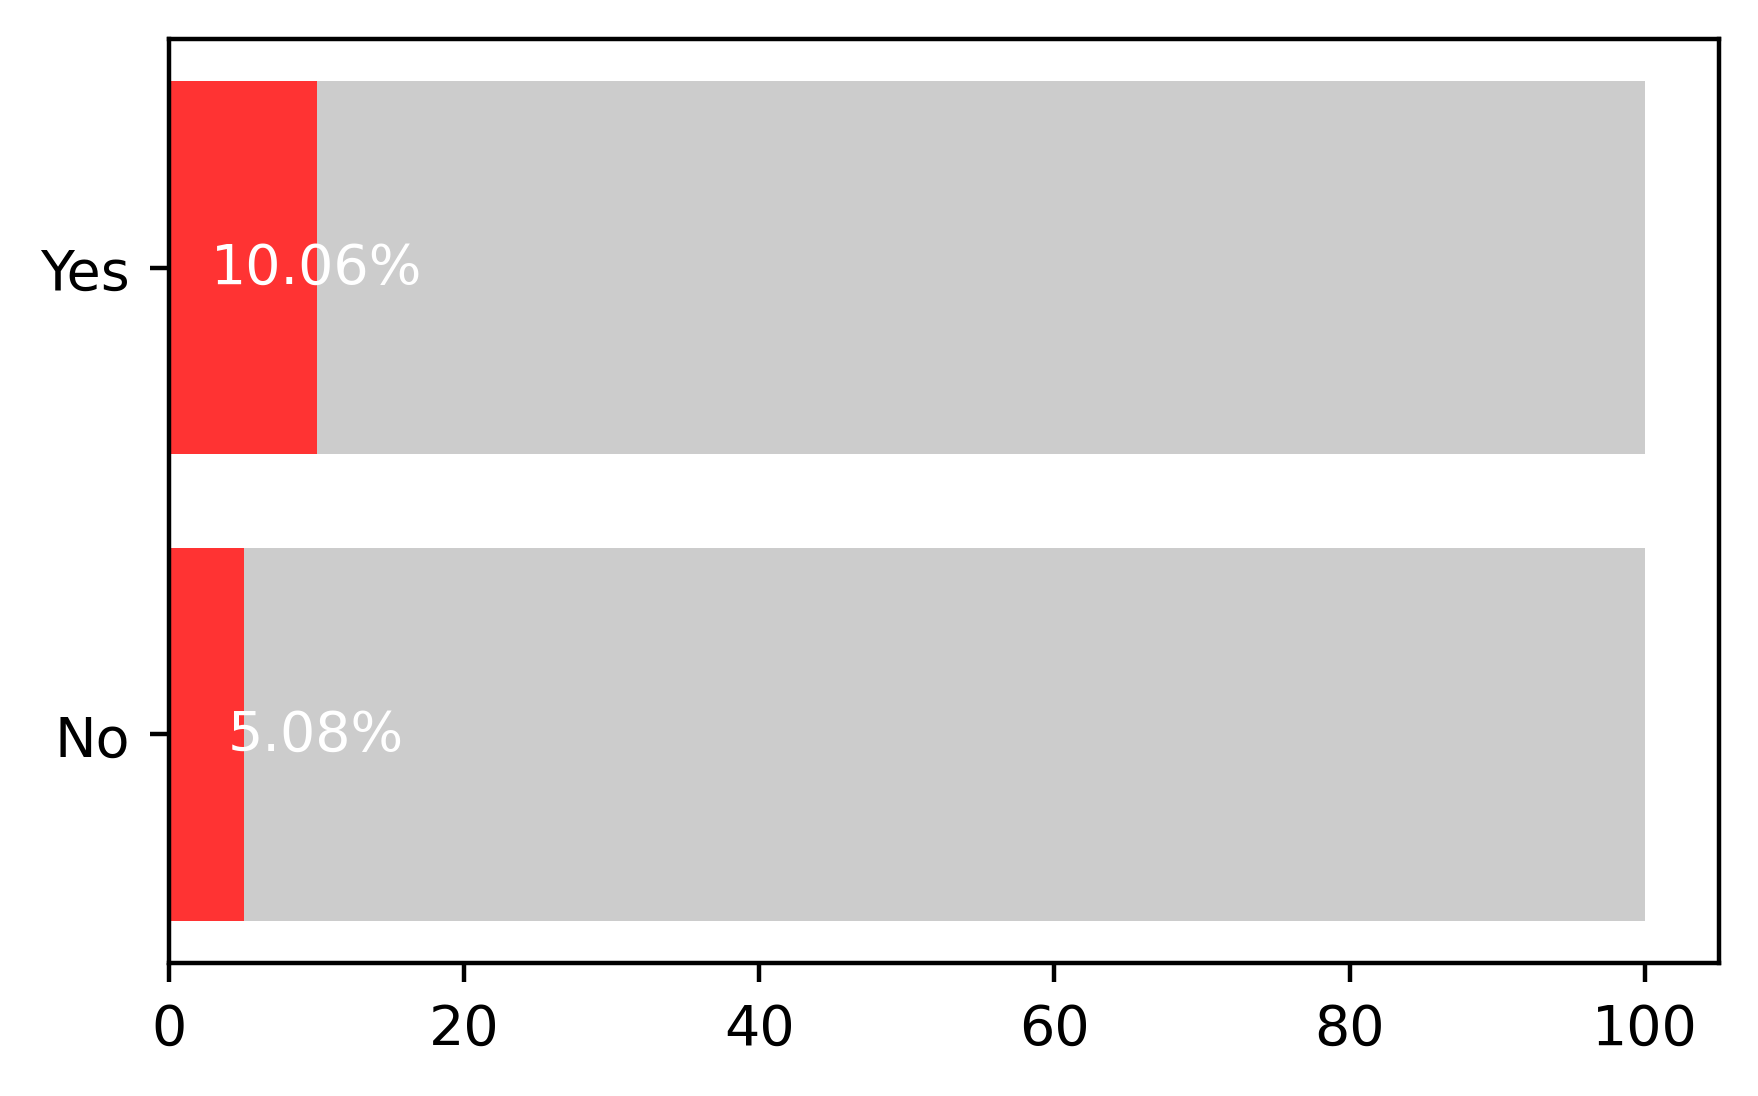

In [47]:
data_agg_viz(health_insurance, 'health_insurance')

### Could Not Afford to See a Doctor
Over 12% of users suffering from heart disease are unable to afford seeing a doctor, highlighting a distressing reality of limited access to healthcare.

People that cannot afford to see a doctor may be less likely to seek preventive care or manage risk factors for heart disease, leading to a higher risk of developing the condition.

In [48]:
no_doc_cost = data_aggregation(heart_data_cl, 'no_doc_cost')
no_doc_cost

,no_doc_cost,total_population,heart_disease,%heart_disease,no_disease,%no_disease
1,Yes,14947,1528,10.22,13419,89.78
0,No,187407,18395,9.82,169012,90.18


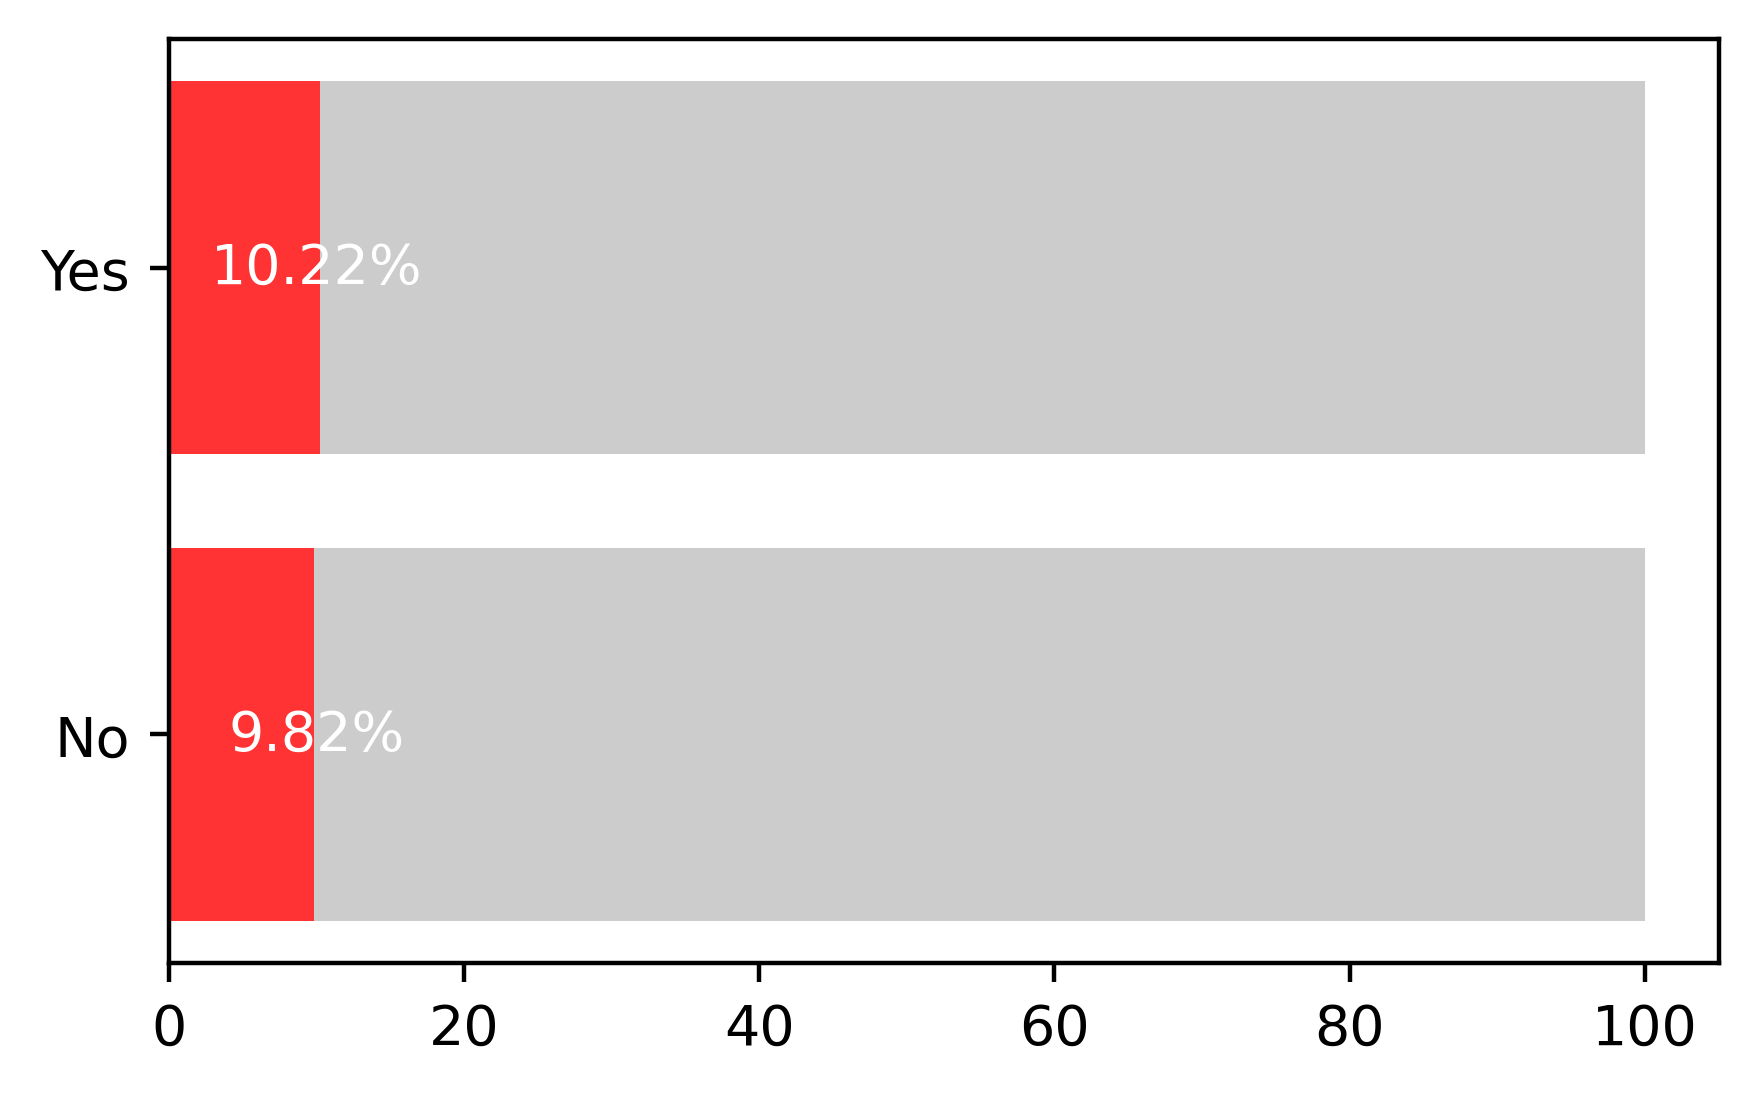

In [49]:
data_agg_viz(no_doc_cost, 'no_doc_cost')